# **Time Series Analysis of Passengers at Singapore Changi Airport**

---

This project is about time series analysis of passenger traffic at Singapore Changi Airport spanning from 2009 to 2019. As one of the world's busiest airports, Singapore Changi Airport serves as a critical aviation hub, connecting over 100 airlines to approximately 380 cities worldwide. With around 7,400 flights departing or arriving weekly and over 65.6 million passengers passing through annually which makes it an interesting subject for time series analysis. Through this analysis, we aim to find patterns, trends, and seasonal variations in passenger traffic, providing insights into the dynamics of air travel at Changi Airport. This project offers valuable insights into understanding and forecasting passengers trends at one of Asia's biggest airports.


# **About my data**


This dataset captures the passenger traffic at Singapore Changi Airport from 2009 to 2019. The dataset contains two columns: **Month and Value**.


* **Got it from:** [Air Passengers @SGP Changi Airport for past 10yrs](https://www.kaggle.com/datasets/gohsoonheng/air-passengers-sgp-changi-airport-for-past-10yrs/data)

* **What it is:**  The dataset consist of total number of passengers passing through SINGAPORE Changi Airport for a specific month starting from Jan 2009 to Oct 2019.

* **Form:**  CSV

* **Time:**  Recorded **Monthly**

* **shape:**  130 rows, 2 columns



To ensure a good structure of this notebook and of our analysis, we will divide the work into sections, each focusing on specific aspects of the time series analysis.


# **Section 1: Data Exploration**

In this section, we will focus on exploring our time series to gain a deeper understanding of its patterns and characteristics of the passenger traffic at Singapore Changi Airport.





In [318]:
data = read.csv("total-passenger-arrival-2009-2019.csv", header = FALSE)
data

V1,V2
<chr>,<chr>
month,value
2009-01,3073677
2009-02,2558953
2009-03,2901885
2009-04,2914509
2009-05,2787124
2009-06,3053035
2009-07,3169720
2009-08,3162960


In [ ]:
dim(data)


[1] 131   2

In [320]:
data = data$V2[-1]
data

[1] "3073677" "2558953" "2901885" "2914509" "2787124" "3053035" "3169720"
  [8] "3162960" "3063650" "3320887" "3365250" "3832328" "3384473" "3108244"
 [15] "3448617" "3283071" "3389972" "3621082" "3673387" "3467630" "3393497"
 [22] "3581850" "3623080" "4063874" "3787070" "3390264" "3708592" "3731875"
 [29] "3773137" "4011823" "4172971" "3855722" "3817720" "3878788" "3890535"
 [36] "4525348" "4244834" "3770270" "4277559" "4206420" "4089894" "4402693"
 [43] "4360693" "4276912" "4002344" "4268532" "4365456" "4916197" "4325530"
 [50] "4117962" "4608339" "4240461" "4281153" "4669334" "4536572" "4678005"
 [57] "4279588" "4405289" "4464415" "5119439" "4596764" "4109038" "4493991"
 [64] "4383872" "4368639" "4654569" "4581591" "4649022" "4256229" "4490180"
 [71] "4415710" "5093465" "4420122" "4121357" "4535119" "4391381" "4480261"
 [78] "4699589" "4893574" "4955301" "4421554" "4600789" "4636752" "5293165"
 [85] "4860156" "4602026" "4902767" "4793662" "4781918" "4838307" "5181108"
 [92] "4923309" "4584383" "4768937" "4784818" "5676648" "5256301" "4669729"
 [99] "5112576" "5168548" "5003578" "5208779" "5415734" "5265703" "4927561"
[106] "5155327" "5173747" "5861990" "5303639" "4932345" "5555117" "5430745"
[113] "5294980" "5565775" "5723094" "5682688" "5225903" "5376234" "5408993"
[120] "6127843" "5656076" "5131807" "5630780" "5580503" "5407308" "5816089"
[127] "5910782" "5900629" "5469342" "5646643"


In this step, we transform our dataframe into a time series
object.

In [321]:
ts_data = ts(data, start = c(2009, 1),frequency = 12)
ts_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,3073677,2558953,2901885,2914509,2787124,3053035,3169720,3162960,3063650,3320887,3365250,3832328
2010,3384473,3108244,3448617,3283071,3389972,3621082,3673387,3467630,3393497,3581850,3623080,4063874
2011,3787070,3390264,3708592,3731875,3773137,4011823,4172971,3855722,3817720,3878788,3890535,4525348
2012,4244834,3770270,4277559,4206420,4089894,4402693,4360693,4276912,4002344,4268532,4365456,4916197
2013,4325530,4117962,4608339,4240461,4281153,4669334,4536572,4678005,4279588,4405289,4464415,5119439
2014,4596764,4109038,4493991,4383872,4368639,4654569,4581591,4649022,4256229,4490180,4415710,5093465
2015,4420122,4121357,4535119,4391381,4480261,4699589,4893574,4955301,4421554,4600789,4636752,5293165
2016,4860156,4602026,4902767,4793662,4781918,4838307,5181108,4923309,4584383,4768937,4784818,5676648
2017,5256301,4669729,5112576,5168548,5003578,5208779,5415734,5265703,4927561,5155327,5173747,5861990
2018,5303639,4932345,5555117,5430745,5294980,5565775,5723094,5682688,5225903,5376234,5408993,6127843


In [322]:
class(ts_data)

[1] "ts"

In [323]:
summary(ts_data)

   Length     Class      Mode 
      130        ts character 

In [324]:
any(is.na(ts_data))

[1] FALSE

In [325]:
ts_data = na.omit(ts_data)

In [326]:
ts_data_numeric = as.numeric(ts_data)

In [327]:
any(is.na(ts_data_numeric))

[1] FALSE

In [328]:
class(ts_data_numeric)

[1] "numeric"

In [329]:
ts_data_numeric

[1] 3073677 2558953 2901885 2914509 2787124 3053035 3169720 3162960 3063650
 [10] 3320887 3365250 3832328 3384473 3108244 3448617 3283071 3389972 3621082
 [19] 3673387 3467630 3393497 3581850 3623080 4063874 3787070 3390264 3708592
 [28] 3731875 3773137 4011823 4172971 3855722 3817720 3878788 3890535 4525348
 [37] 4244834 3770270 4277559 4206420 4089894 4402693 4360693 4276912 4002344
 [46] 4268532 4365456 4916197 4325530 4117962 4608339 4240461 4281153 4669334
 [55] 4536572 4678005 4279588 4405289 4464415 5119439 4596764 4109038 4493991
 [64] 4383872 4368639 4654569 4581591 4649022 4256229 4490180 4415710 5093465
 [73] 4420122 4121357 4535119 4391381 4480261 4699589 4893574 4955301 4421554
 [82] 4600789 4636752 5293165 4860156 4602026 4902767 4793662 4781918 4838307
 [91] 5181108 4923309 4584383 4768937 4784818 5676648 5256301 4669729 5112576
[100] 5168548 5003578 5208779 5415734 5265703 4927561 5155327 5173747 5861990
[109] 5303639 4932345 5555117 5430745 5294980 5565775 5723094 5682688 5225903
[118] 5376234 5408993 6127843 5656076 5131807 5630780 5580503 5407308 5816089
[127] 5910782 5900629 5469342 5646643

In [330]:
options(repr.plot.width = 10, repr.plot.height = 6)

## **Helpful plots of the Data**

Below some plots that help us visualize and understand how our data is distributed and the relationship between its datapoints


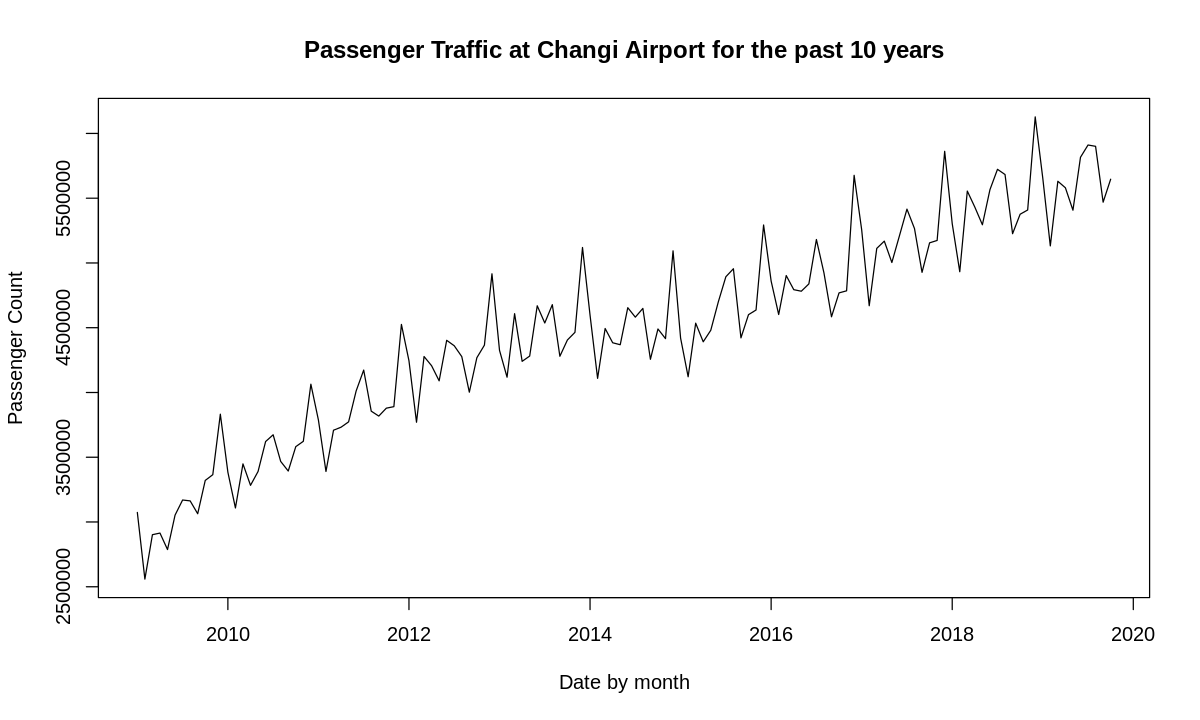

In [331]:
plot(ts_data,
     type = "l",
     xlab = "Date by month",
     ylab = "Passenger Count",
     main = "Passenger Traffic at Changi Airport for the past 10 years"
)

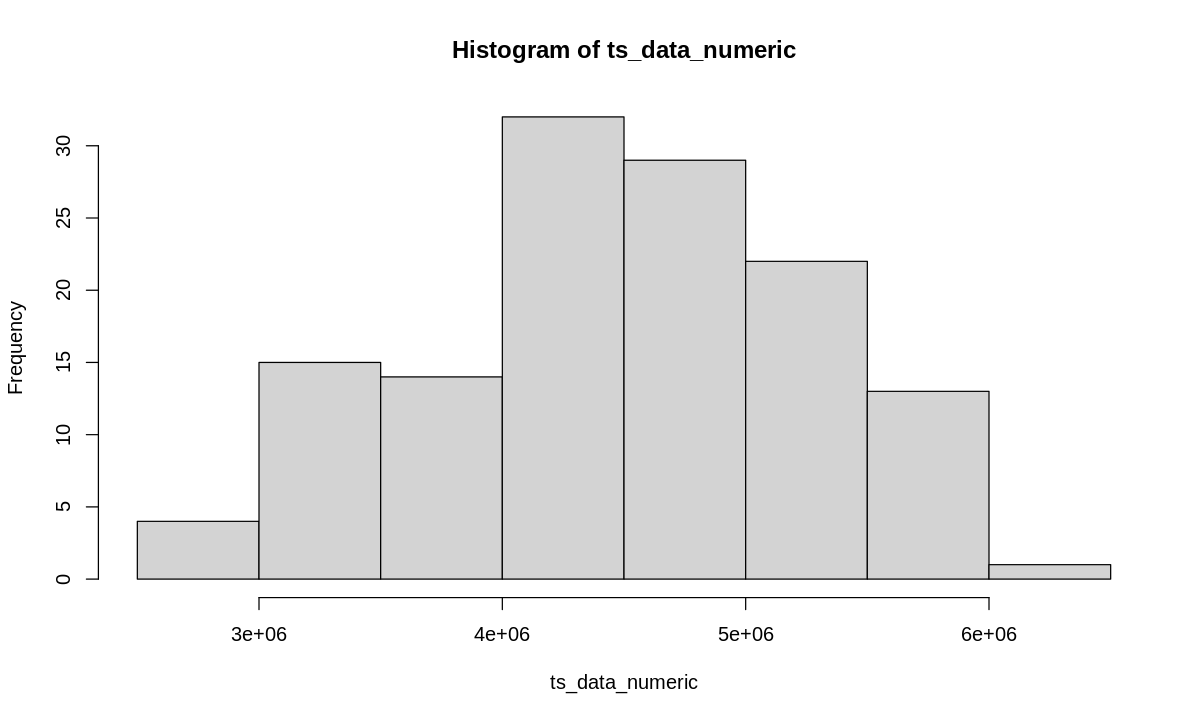

In [332]:
hist(ts_data_numeric)

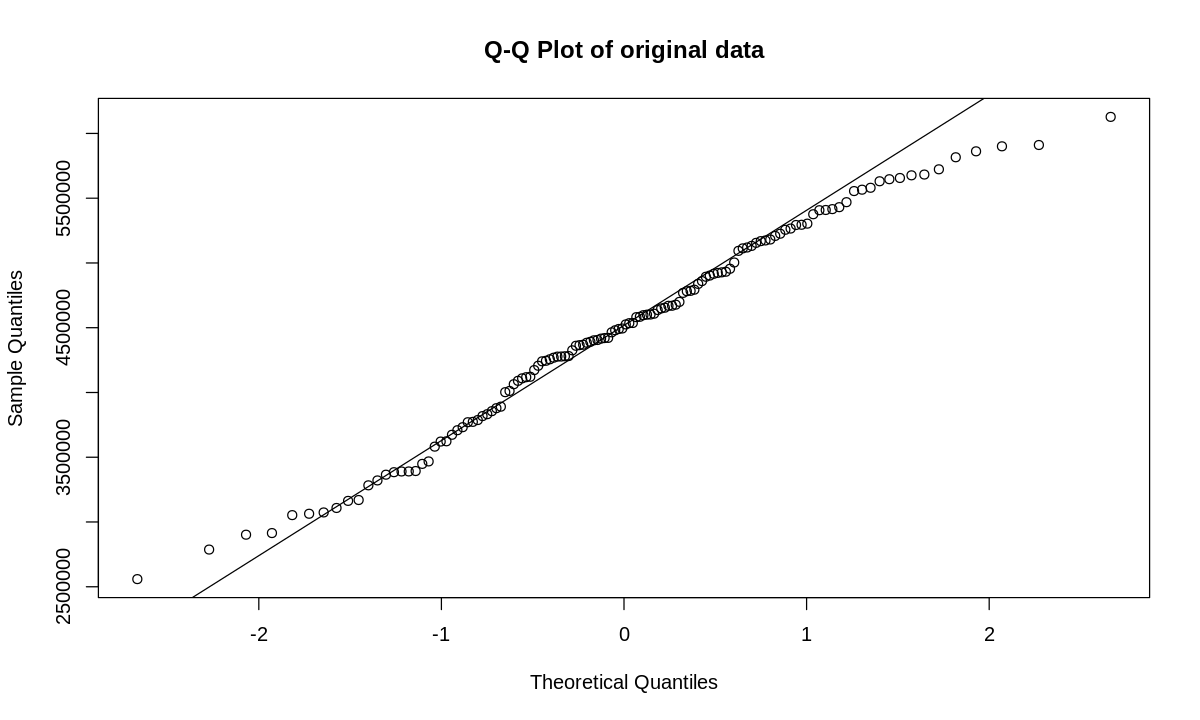

In [333]:
qqnorm(ts_data_numeric, main = "Q-Q Plot of original data")
qqline(ts_data_numeric)


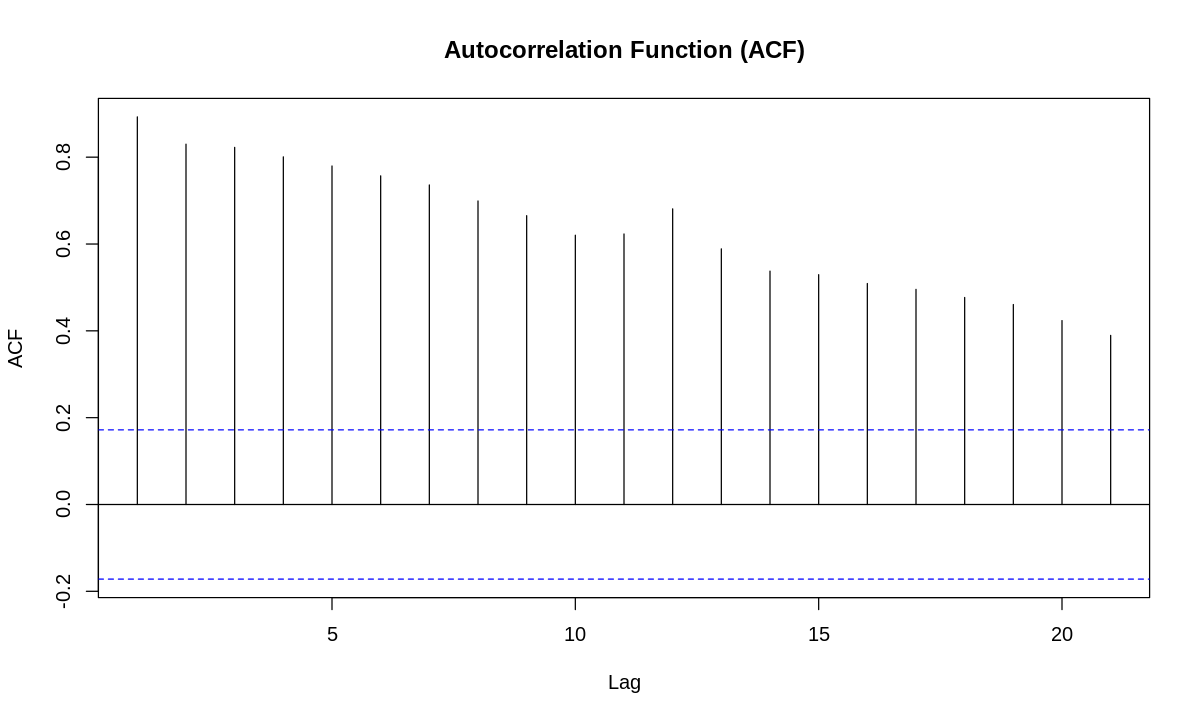

In [334]:
acf(ts_data_numeric, main = "Autocorrelation Function (ACF)")

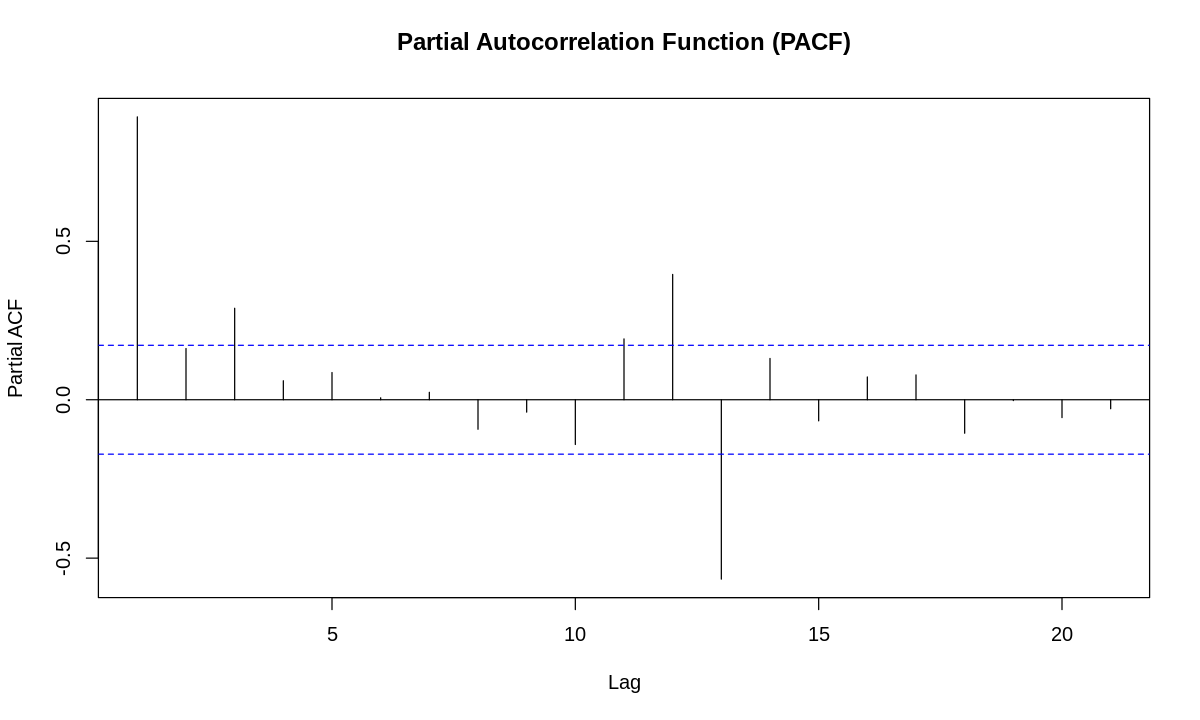

In [335]:
pacf(ts_data_numeric,  main = "Partial Autocorrelation Function (PACF)")

## **Discussion of Data Plot**

Looking at the plot, we can see a clear linear trend in passenger numbers over time, suggesting that more people are traveling through the airport each year. However, the variance is not stable, meaning that passenger numbers vary a lot from month to month and year to year. These ups and downs could be due to things like seasonal changes in travel, economic factors, or unexpected events affecting travel plans.

## **Data Splitting: Train and Test**

To train our time series models effectively and evaluate their performance, we will split our dataset into two parts: a training set and a test set.

- **Training Set**: The part that we will use for training our model - **80%**
- **Test Set**: The part that we will use for evaluating and testing our model - **20%**

.


In [336]:
train_proportion = 0.8

test_proportion = 1 - train_proportion

test_size = round(test_proportion * length(ts_data))

all_indices = seq_len(length(ts_data))

test_start_index = length(ts_data) - test_size + 1

test_indices = all_indices[test_start_index:length(ts_data)]

train_indices = all_indices[!all_indices %in% test_indices]

train_data = ts_data[train_indices]
test_data = ts_data[test_indices]



In [337]:
ts_data = train_data
ts_data = ts(ts_data, start = c(2009, 1),frequency = 12)
ts_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,3073677,2558953,2901885,2914509,2787124,3053035,3169720,3162960,3063650,3320887,3365250,3832328
2010,3384473,3108244,3448617,3283071,3389972,3621082,3673387,3467630,3393497,3581850,3623080,4063874
2011,3787070,3390264,3708592,3731875,3773137,4011823,4172971,3855722,3817720,3878788,3890535,4525348
2012,4244834,3770270,4277559,4206420,4089894,4402693,4360693,4276912,4002344,4268532,4365456,4916197
2013,4325530,4117962,4608339,4240461,4281153,4669334,4536572,4678005,4279588,4405289,4464415,5119439
2014,4596764,4109038,4493991,4383872,4368639,4654569,4581591,4649022,4256229,4490180,4415710,5093465
2015,4420122,4121357,4535119,4391381,4480261,4699589,4893574,4955301,4421554,4600789,4636752,5293165
2016,4860156,4602026,4902767,4793662,4781918,4838307,5181108,4923309,4584383,4768937,4784818,5676648
2017,5256301,4669729,5112576,5168548,5003578,5208779,5415734,5265703,,,,


In [338]:
ts_data_numeric = as.numeric(ts_data)

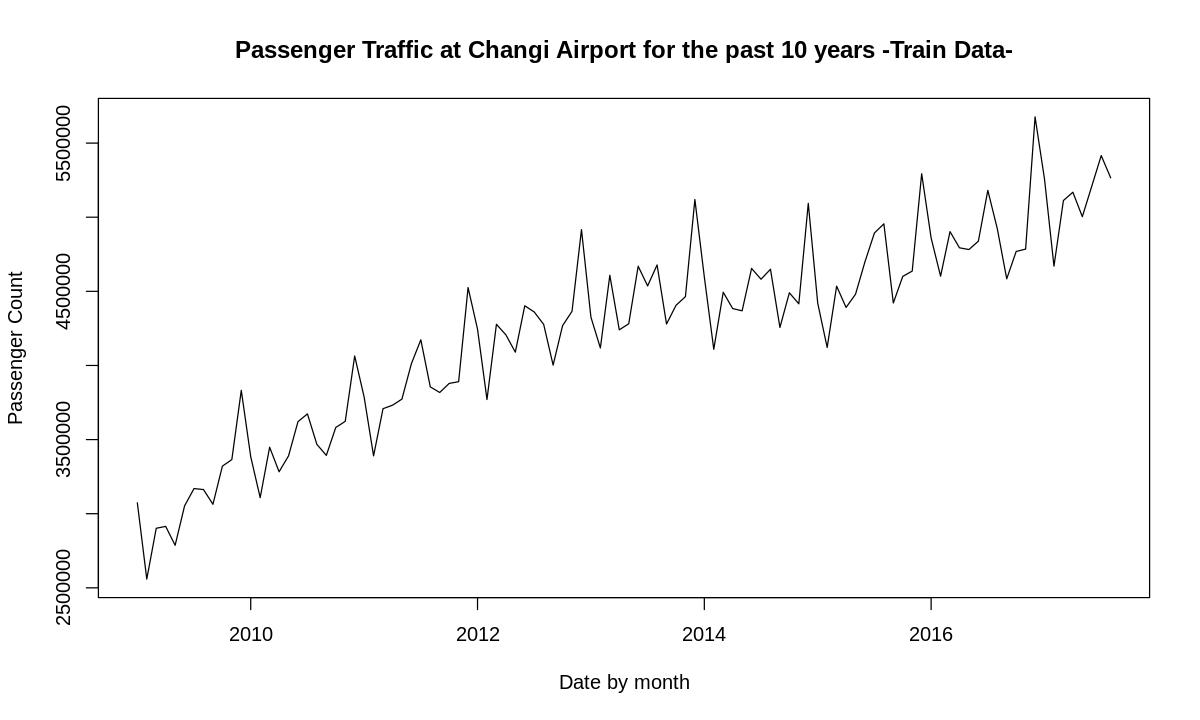

In [339]:
plot(ts_data,
     type = "l",
     xlab = "Date by month",
     ylab = "Passenger Count",
     main = "Passenger Traffic at Changi Airport for the past 10 years -Train Data-"
     )

In [340]:
test_data = ts(test_data, start = c(2017, 9),frequency = 12)
test_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,,,,,4927561,5155327,5173747,5861990
2018,5303639,4932345,5555117,5430745,5294980,5565775,5723094,5682688,5225903,5376234,5408993,6127843
2019,5656076,5131807,5630780,5580503,5407308,5816089,5910782,5900629,5469342,5646643,,


In [341]:
test_data_numeric = as.numeric(test_data)

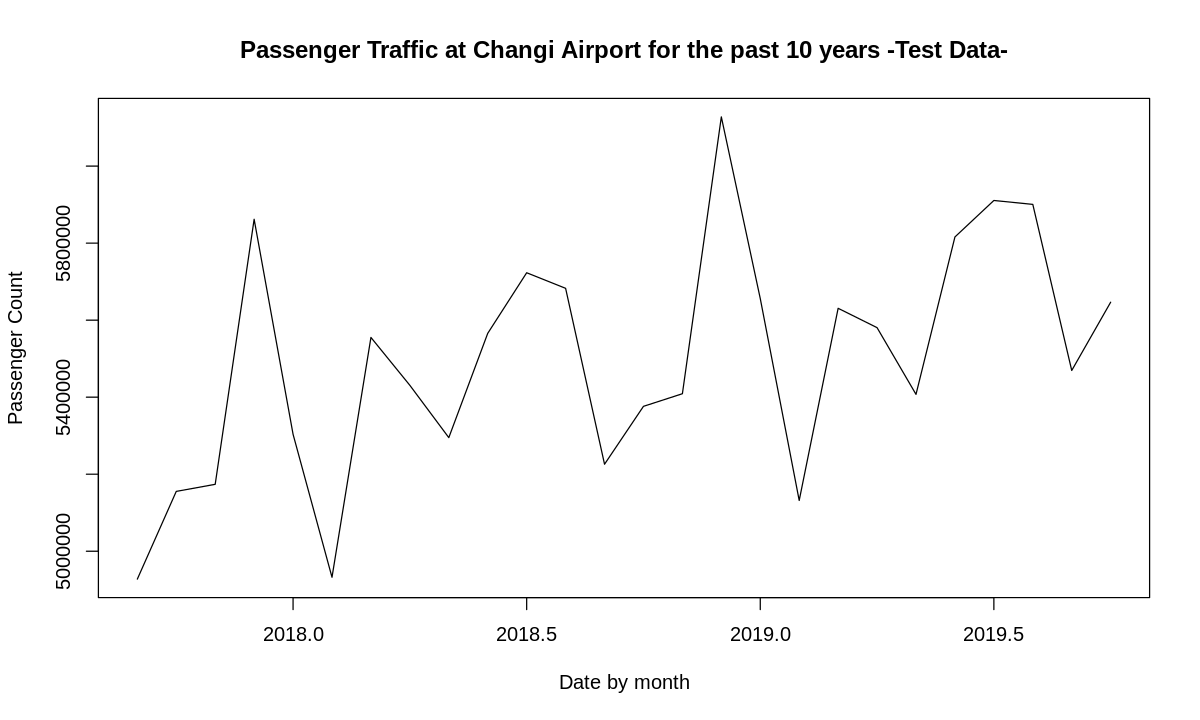

In [342]:
plot(test_data,
     type = "l",
     xlab = "Date by month",
     ylab = "Passenger Count",
     main = "Passenger Traffic at Changi Airport for the past 10 years -Test Data-"
     )

#**Section 2: Exploring Candidate Models**

In this section, we start  the process of searching for candidate models to analyze our time series data effectively. We will explore various ARIMA models, by exploring these candidate models, we aim to identify the most suitable approach for modeling our data.

In [343]:
install.packages("forecast")
install.packages("TSA")
install.packages("DescTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [344]:
library(forecast)
library(TSA)
library(tseries)
library(DescTools)

## **Box-Cox Transformation for Variance Stabilization**

Before proceeding with modeling, it's essential to stabilize the variance of our time series data. One common technique for achieving this is the Box-Cox transformation. By applying the Box-Cox transformation, we aim to make the variance of the passenger traffic data more consistent.

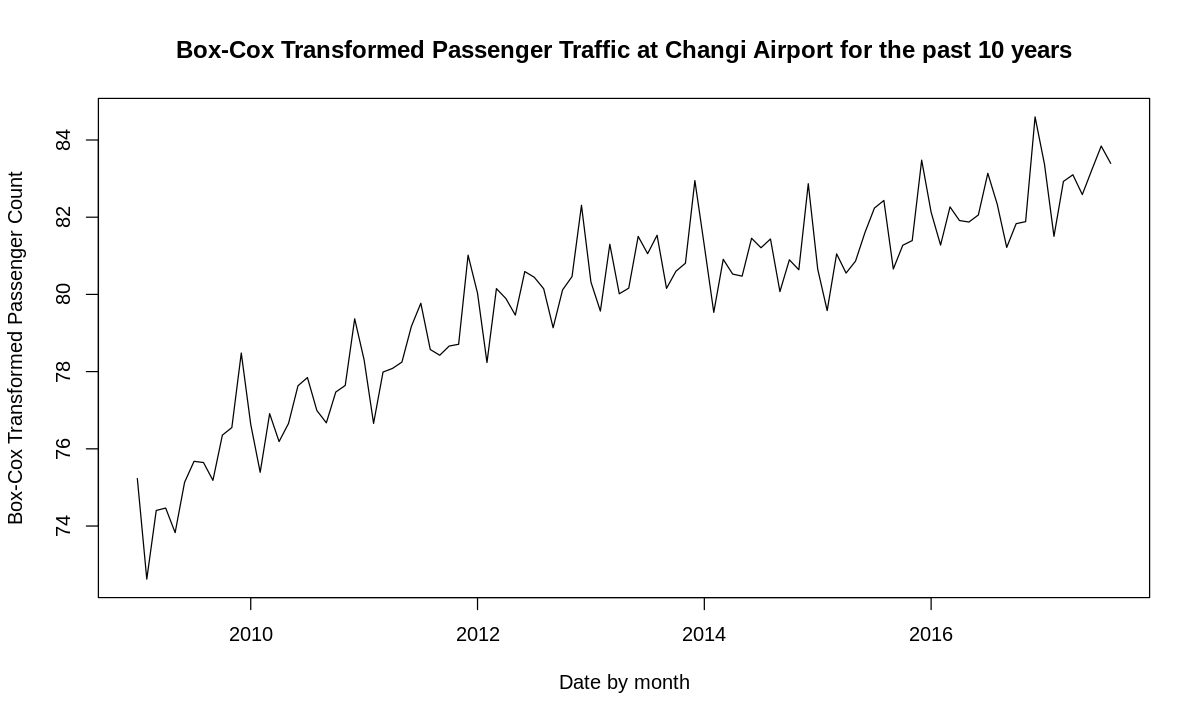

In [345]:
data_boxcox = forecast::BoxCox(ts_data_numeric, lambda = "auto")

ts_data_boxcox = ts(data_boxcox, start = start(ts_data), frequency = frequency(ts_data))


plot(ts_data_boxcox,
     type = "l",
     xlab = "Date by month",
     ylab = "Box-Cox Transformed Passenger Count",
     main = "Box-Cox Transformed Passenger Traffic at Changi Airport for the past 10 years"
     )


In [346]:
lambda_value = attr(ts_data_boxcox, "lambda")
lambda_value

[1] 0.178778

### **Discussion of Lambda**

Upon conducting the Box-Cox transformation on our time series data, we obtained a lambda value of approximately 0.18. Since this value is close to 0, it suggests that a logarithmic transformation may be more appropriate for stabilizing the variance of the data.
However, I will proceed with the Box-Cox transformation as implemented by the `boxcox()` function.

## **First Difference for Trend Removal**

To remove the linear trend  from our time series data, we will apply the first difference transformation. We aim to eliminate the linear trend present in the data and try to make it stationary and more amenable to modeling techniques that assume stationarity.**bold text**

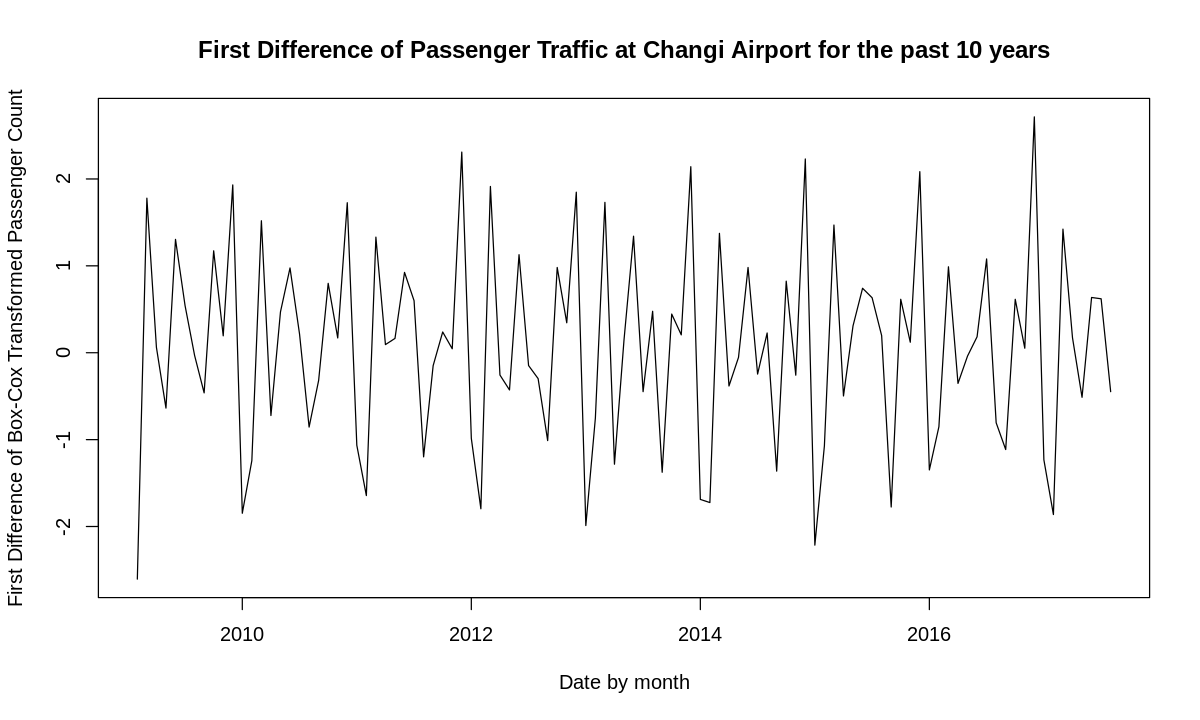

In [347]:
ts_data_boxcox_diff = diff(ts_data_boxcox)

plot(ts_data_boxcox_diff,
     type = "l",
     xlab = "Date by month",
     ylab = "First Difference of Box-Cox Transformed Passenger Count",
     main = "First Difference of Passenger Traffic at Changi Airport for the past 10 years"
)


### **Discussion of Resulting Data Plot**

Looking at the plot of the resulting data after applying the first difference transformation, we can see that the linear trend has been removed effectively. This means the data now is stationary, without a clear upward or downward trend. Overall, the plot confirms that the first difference transformation has achieved its goal of detrending the data.


### **Augmented Dickey-Fuller Test (ADF) for Stationarity**

In order to assess the stationarity of our time series data after applying the first difference transformation, we will conduct the Augmented Dickey-Fuller (ADF) test.


In [348]:
adf.test(ts_data_boxcox_diff)

Warning message in adf.test(ts_data_boxcox_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_data_boxcox_diff
Dickey-Fuller = -9.1717, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


### **Discussion of ADF Test Results**

The Augmented Dickey-Fuller (ADF) test results indicate a significant p-value of 0.01, which is smaller than the printed p-value which is less than 0.05. These results provide compelling evidence that the first difference transformation has successfully rendered the data stationary, validating its suitability for further time series analysis and modeling.


### **Distribution of Data after First Difference**

To visualize the distribution of the data after applying the first difference transformation, we can create a plots and do test to assess the new data.



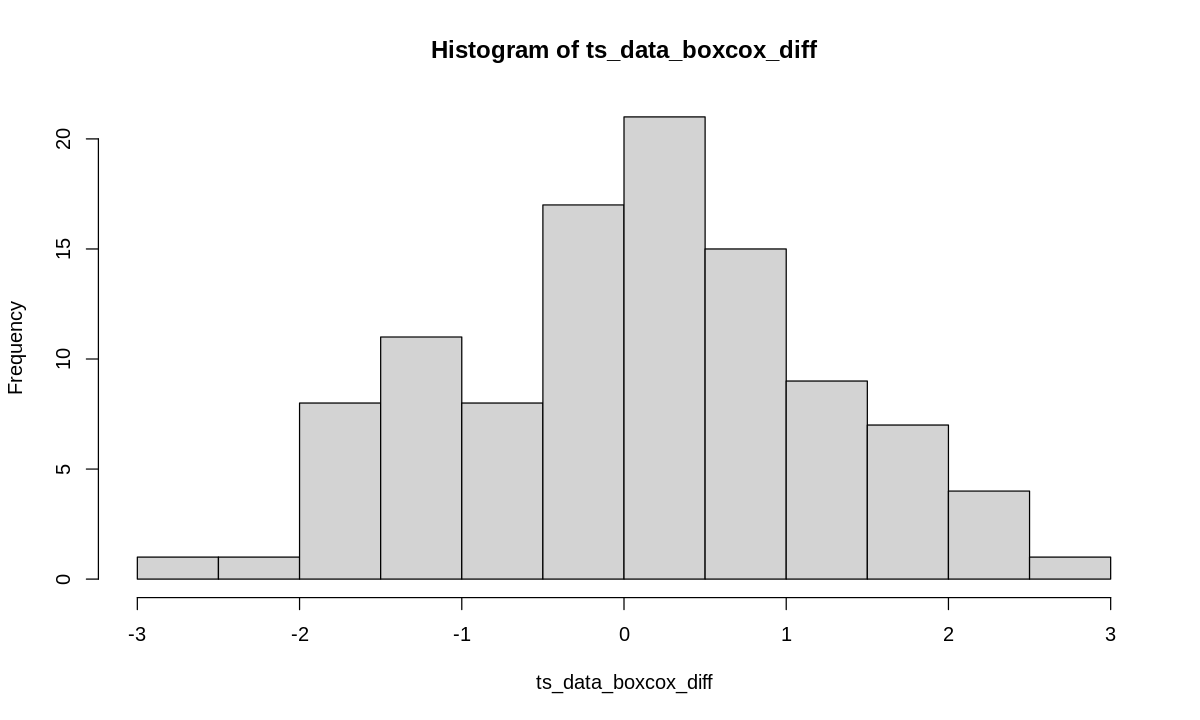

In [349]:
hist(ts_data_boxcox_diff)

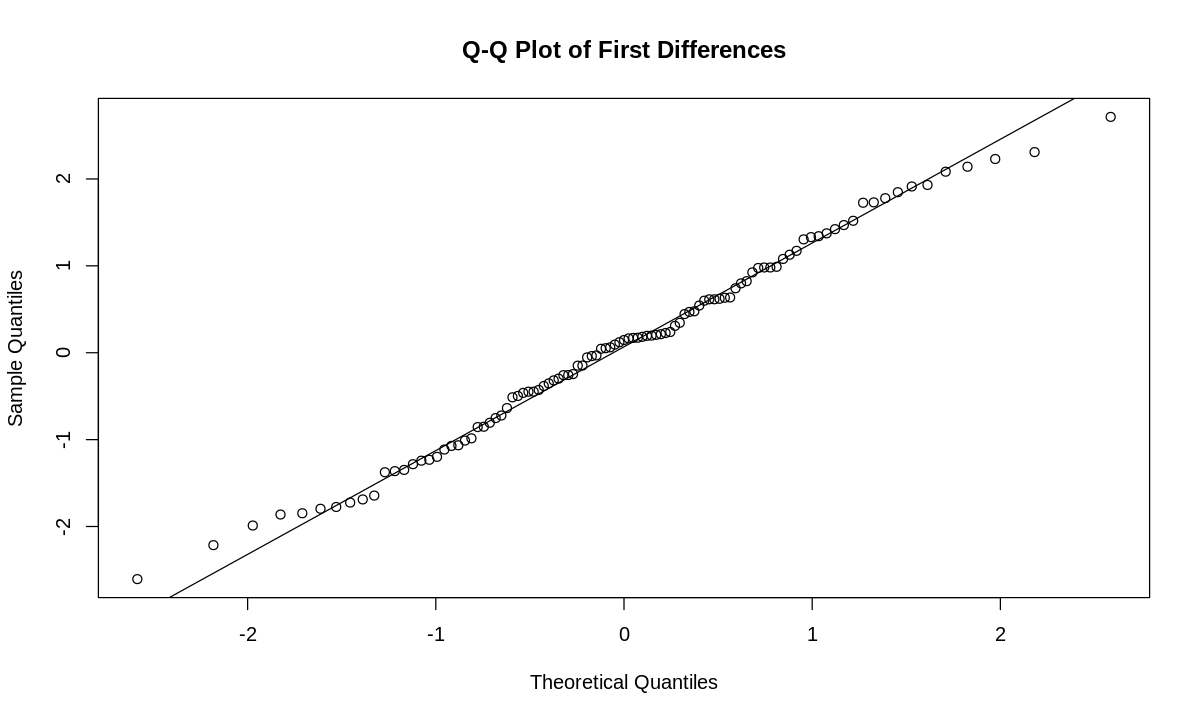

In [350]:
qqnorm(ts_data_boxcox_diff, main = "Q-Q Plot of First Differences")
qqline(ts_data_boxcox_diff)




After visual inspection of the histogram and the QQ plot of the data after applying the first difference transformation, we observe characteristics consistent with normal white noise.

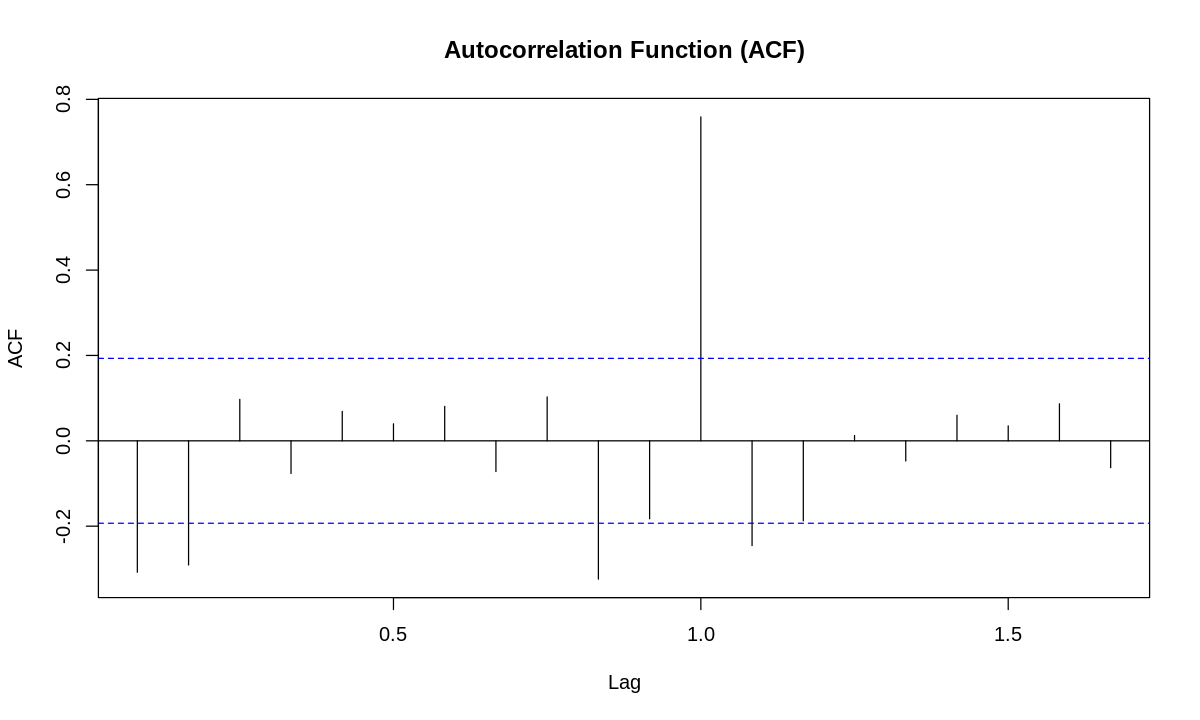

In [351]:
acf(ts_data_boxcox_diff, main = "Autocorrelation Function (ACF)")

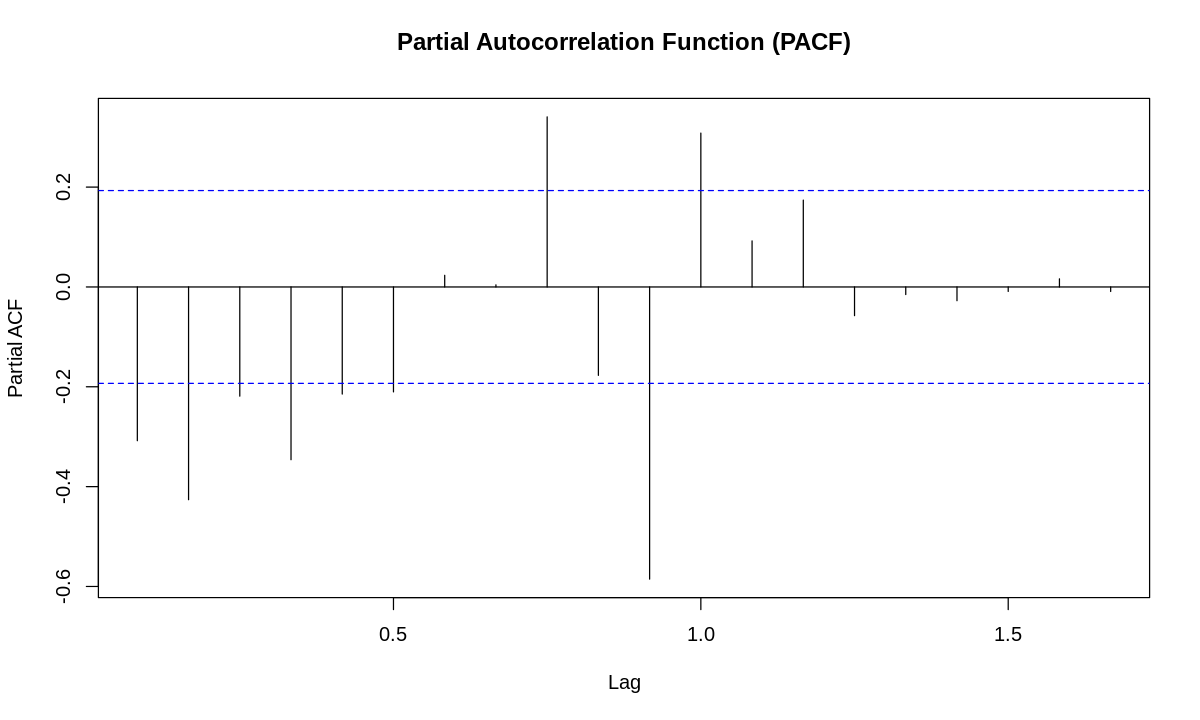

In [352]:
pacf_result = pacf(ts_data_boxcox_diff,  main = "Partial Autocorrelation Function (PACF)")

Upon examining the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the differenced series, we find evidence suggesting non-normality. The presence of significant autocorrelation and partial autocorrelation at multiple lags indicates that the differenced series may still contain systematic patterns or dependencies that deviate from normal white noise.



### Shapiro-Wilk Test for Normality

To formally assess the normality of the differenced series, we will conduct the Shapiro-Wilk test.


In [353]:
shapiro.test(ts_data_boxcox_diff)


	Shapiro-Wilk normality test

data:  ts_data_boxcox_diff
W = 0.99104, p-value = 0.7311


### Brief Discussion of Shapiro-Wilk Test Results

The Shapiro-Wilk test yielded a p-value of 0.7311, it suggests that the data may follow a normal distribution.

### Runs Test for Independence

IWe will conduct the runs test to assess the independence of the first difference data.



In [354]:
RunsTest(ts_data_boxcox_diff)


	Runs Test for Randomness

data:  ts_data_boxcox_diff
z = 2.3777, runs = 65, m = 52, n = 51, p-value = 0.01742
alternative hypothesis: true number of runs is not equal the expected number
sample estimates:
median(x) 
0.1462942 


### Brief Discussion of Runs Test Results for Randomness

The runs test results show a significant p-value of 0.01742, indicating that the observed number of runs differs significantly from the expected number. This suggests that there may be dependencies or patterns present in this data, contradicting the assumption of randomness.


### **What we can conclude from these results**

After performing the first difference on the original data, we found that the resulting data is normally distributed. However, analysis using the runs test revealed that the differenced data is not independent, indicating the presence of dependencies or patterns. These findings suggest that while the differenced data may exhibit characteristics of a stationary process, it is not indicative of **white noise**. Consequently, we conclude that the original data does not follow a **random walk** process, as it exhibits non-random behavior even after differencing.


## **Exploring Additional ARIMA Candidates**

In our proccess of identifying suitable ARIMA models for the time series data, we will explore alternative model configurations beyond ARIMA(0,1,0) -Random Walk-. This involves experimenting with different combinations of autoregressive (AR), differencing (I), and moving average (MA) parameters to identify models that capture the underlying patterns and dynamics of the data effectively.


### **Starting with BIC**

To begin our exploration of alternative ARIMA candidates, we will utilize the (BIC) as a criterion for model selection. The BIC provides a balance between goodness of fit and model complexity, penalizing overly complex models to prevent overfitting.



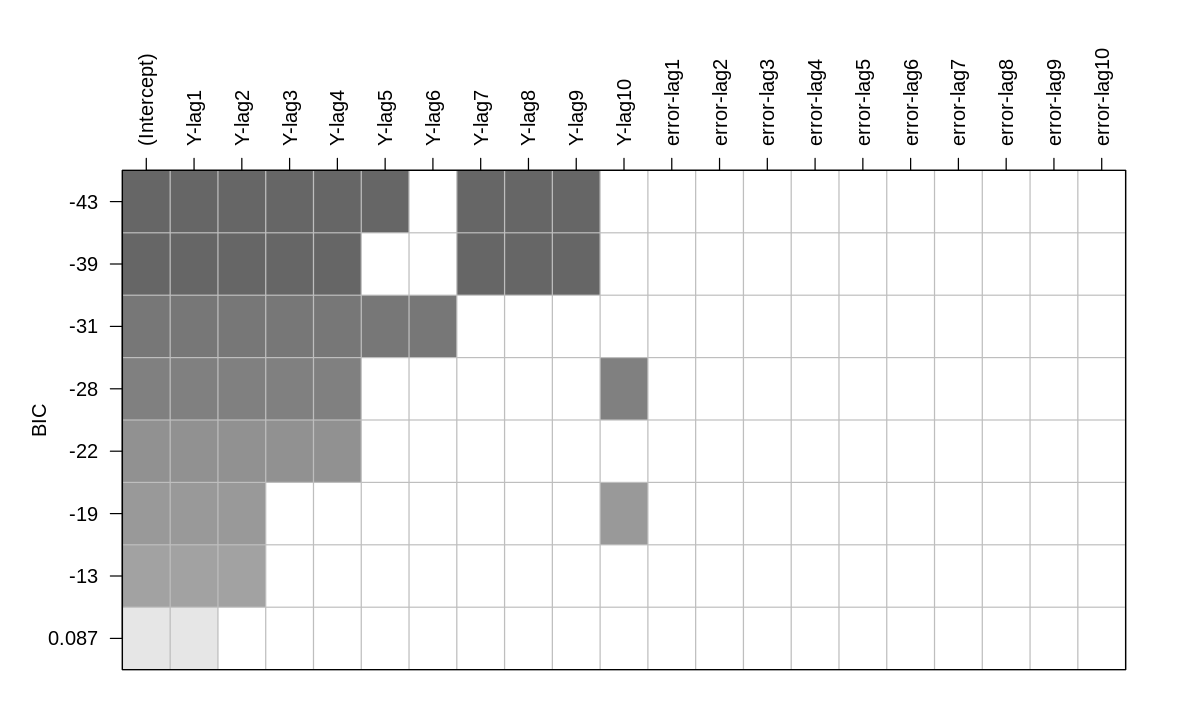

In [355]:
plot(armasubsets(ts_data_boxcox_diff,10,10))

### **Interpretation of BIC Plot Results**

From the BIC plot, we will consider ARIMA configurations with autoregressive (AR) orders of 1, 2, 3, 4, 5, 6, 7, 8, and 9, along with a moving average (MA) order of 0. These configurations correspond to the models with the lowest BIC values, indicating a good balance between model fit and complexity. We will consider two of them which are **ARMA(1,0)** and **ARMA(9,0)** in addition to the first difference so we will get **ARIMA(1,1,0)** and
**ARIMA(9,1,0)** to be considered

## Fitting ARIMA(1,1,0) Model

We will begin by fitting an ARIMA(1,1,0) model to the time series data. After fitting the model, we will conduct an analysis of the residuals to assess its validity.



In [356]:
arima_model_110 = Arima(ts_data_numeric, order = c(1, 1, 0))

summary(arima_model_110)

Series: ts_data_numeric 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.3033
s.e.   0.0947

sigma^2 = 9.397e+10:  log likelihood = -1446.91
AIC=2897.82   AICc=2897.94   BIC=2903.09

Training set error measures:
                   ME   RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 28169.89 303584 235036.1 0.3801744 5.589277 0.9212417 -0.1326883


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 44.417, df = 9, p-value = 1.182e-06

Model df: 1.   Total lags used: 10



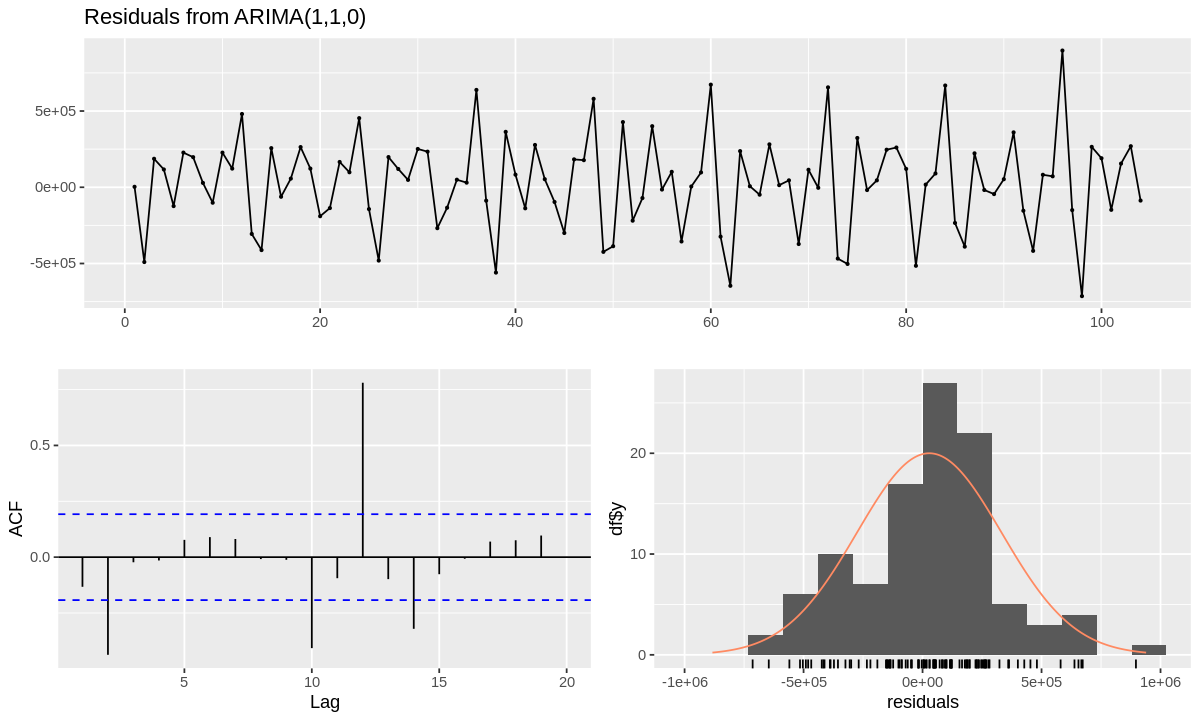

In [357]:
# Diagnostic checks
checkresiduals(arima_model_110)

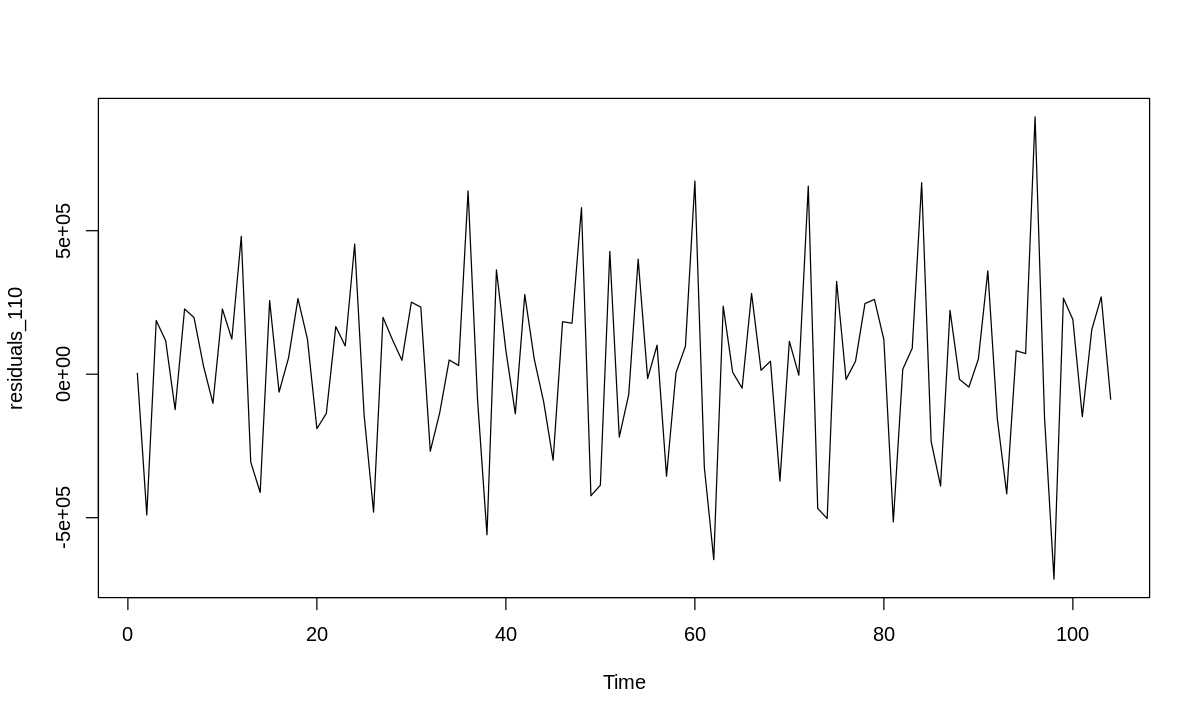

In [358]:
residuals_110 = residuals(arima_model_110)

plot(residuals_110)

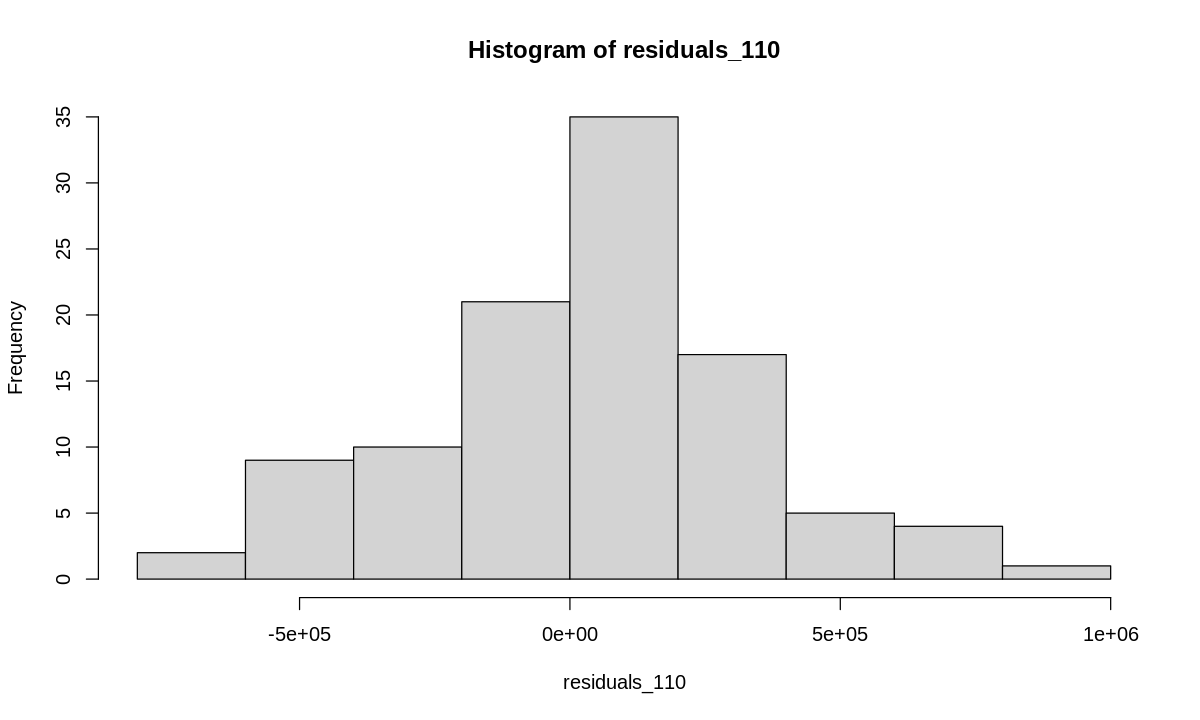

In [359]:
hist(residuals_110)


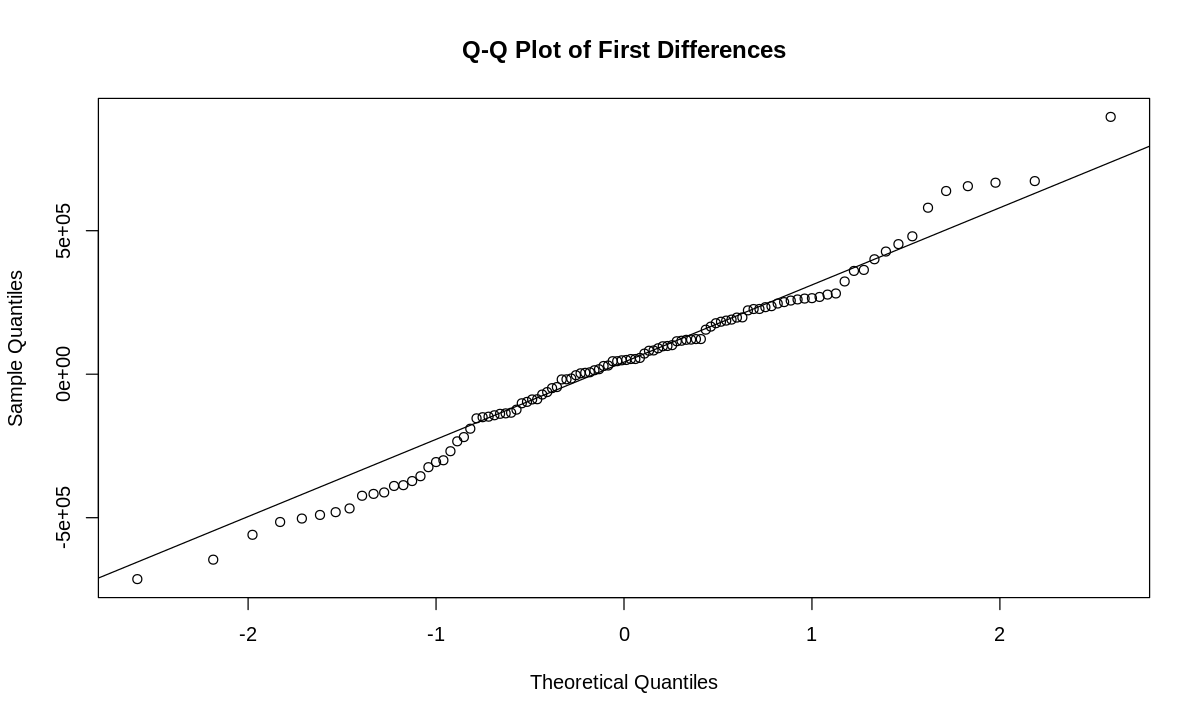

In [360]:
qqnorm(residuals_110, main = "Q-Q Plot of First Differences")
qqline(residuals_110)

In [361]:
# Check for normality
shapiro.test(residuals_110)



	Shapiro-Wilk normality test

data:  residuals_110
W = 0.98457, p-value = 0.2704


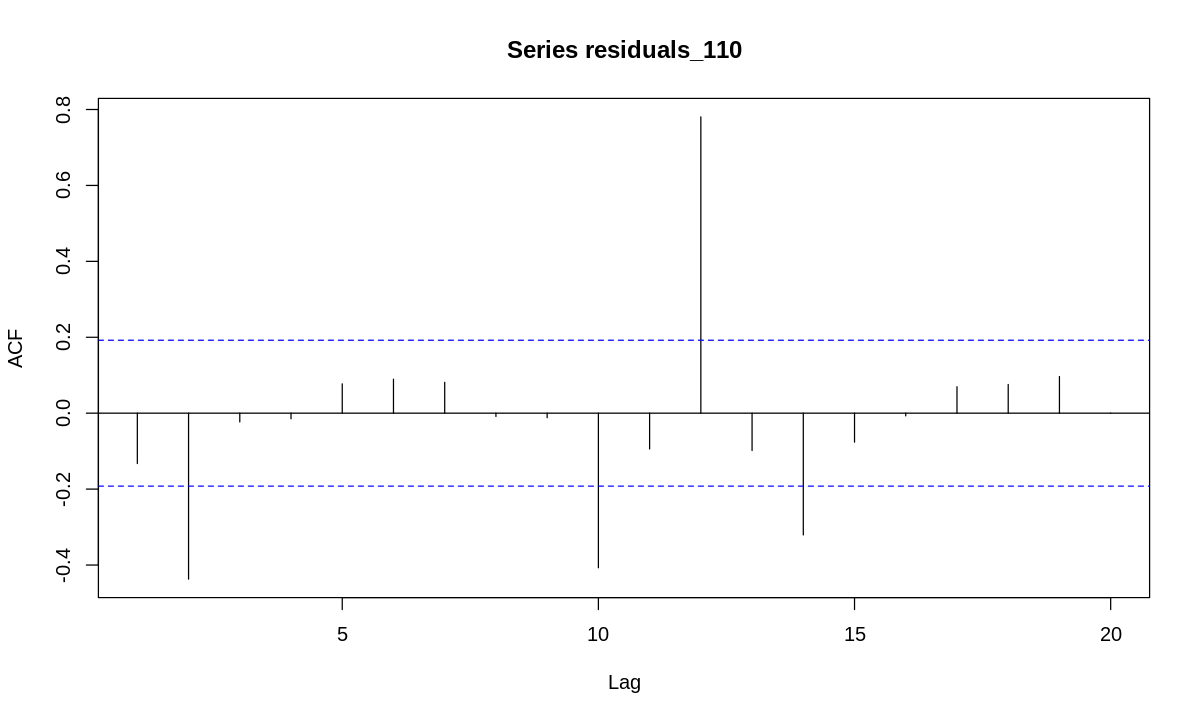

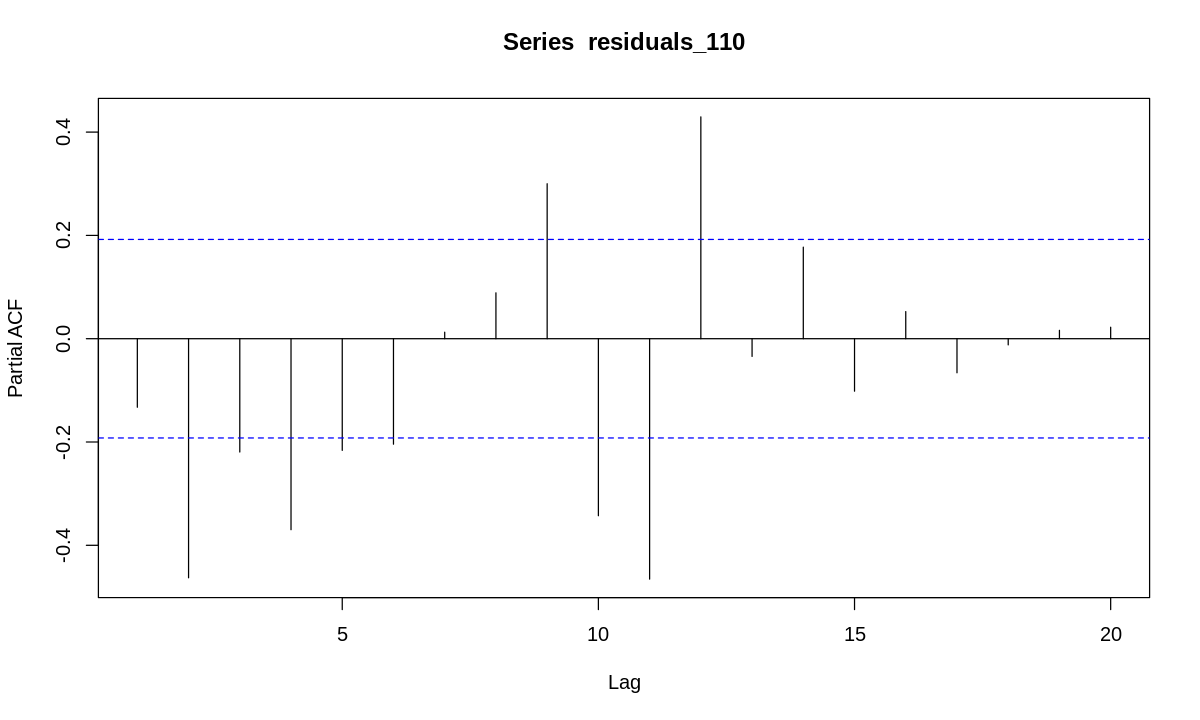

In [362]:
#Check for autocorrelation
acf(residuals_110)
pacf(residuals_110)

In [363]:
#Check for independence
RunsTest(residuals_110)


	Runs Test for Randomness

data:  residuals_110
z = 1.0839, runs = 59, m = 52, n = 52, p-value = 0.2784
alternative hypothesis: true number of runs is not equal the expected number
sample estimates:
median(x) 
 48932.94 


## **Conclusion on ARIMA(1,1,0) Validity**

The residual analysis of the ARIMA(1,1,0) model reveals a mixed picture:

- **Normality**: The residuals appear to exhibit normality, as indicated by visual inspection of the plot and confirmed by the Shapiro-Wilk test, indicating that the residuals exhibit characteristics of normality.
  
- **Independence**: Similarly, the runs test for randomness yields a non-significant p-value of 0.2784,  which  implies that they exhibit randomness

Based on these results, the ARIMA(1,1,0) model demonstrates satisfactory performance in capturing the underlying patterns and dynamics of the time series data. Both normality and randomness assumptions appear to hold for the residuals, supporting the validity of the model for forecasting purposes.


## Fitting ARIMA(9,1,0) Model

We will gor for by fitting an ARIMA(9,1,0) model to the time series data. After fitting the model, we will conduct an analysis of the residuals to assess its validity.



In [364]:
arima_model_910 = Arima(ts_data_numeric, order = c(9,1,0))

summary(arima_model_910)

Series: ts_data_numeric 
ARIMA(9,1,0) 

Coefficients:
          ar1      ar2      ar3      ar4     ar5     ar6     ar7     ar8
      -0.7699  -0.8878  -0.5305  -0.3315  0.1458  0.3561  0.6297  0.5265
s.e.   0.0848   0.1006   0.1178   0.1234  0.1296  0.1279  0.1208  0.1042
         ar9
      0.5115
s.e.  0.0873

sigma^2 = 4.803e+10:  log likelihood = -1410.27
AIC=2840.54   AICc=2842.93   BIC=2866.89

Training set error measures:
                   ME     RMSE    MAE      MPE     MAPE      MASE        ACF1
Training set 28398.31 208351.8 164512 0.519382 3.944839 0.6448172 -0.04887137


	Ljung-Box test

data:  Residuals from ARIMA(9,1,0)
Q* = 72.146, df = 3, p-value = 1.443e-15

Model df: 9.   Total lags used: 12



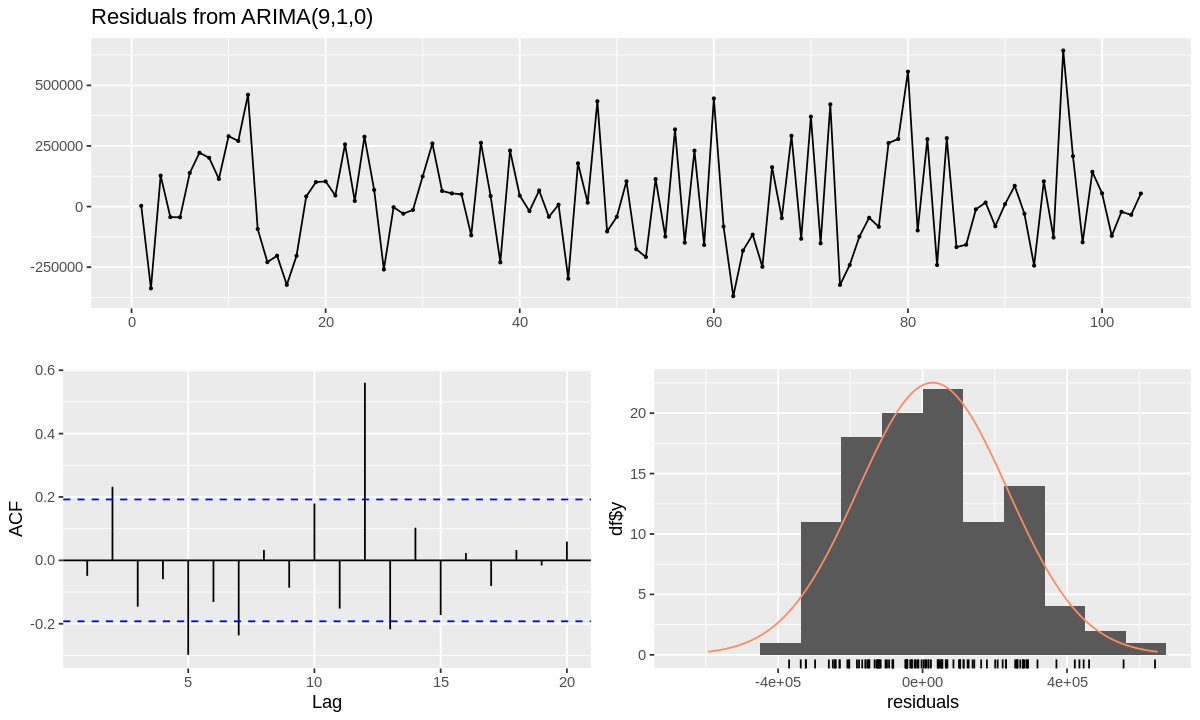

In [365]:
# Diagnostic checks
checkresiduals(arima_model_910)

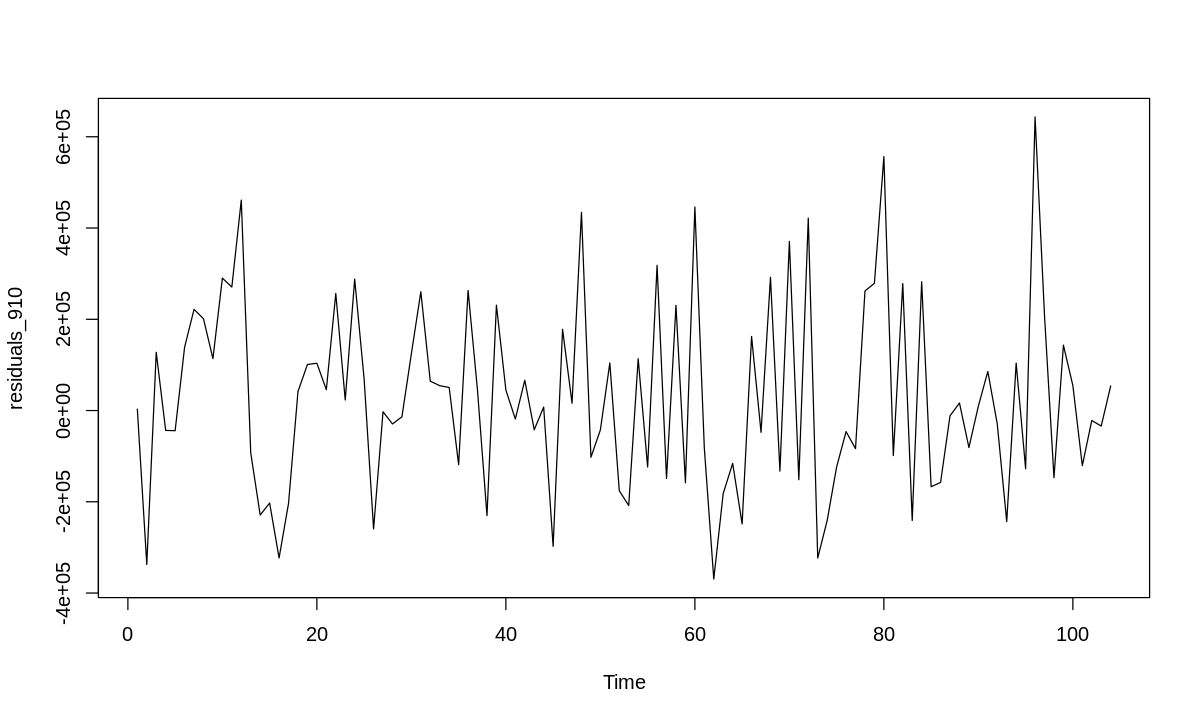

In [366]:
residuals_910 = residuals(arima_model_910)

plot(residuals_910)

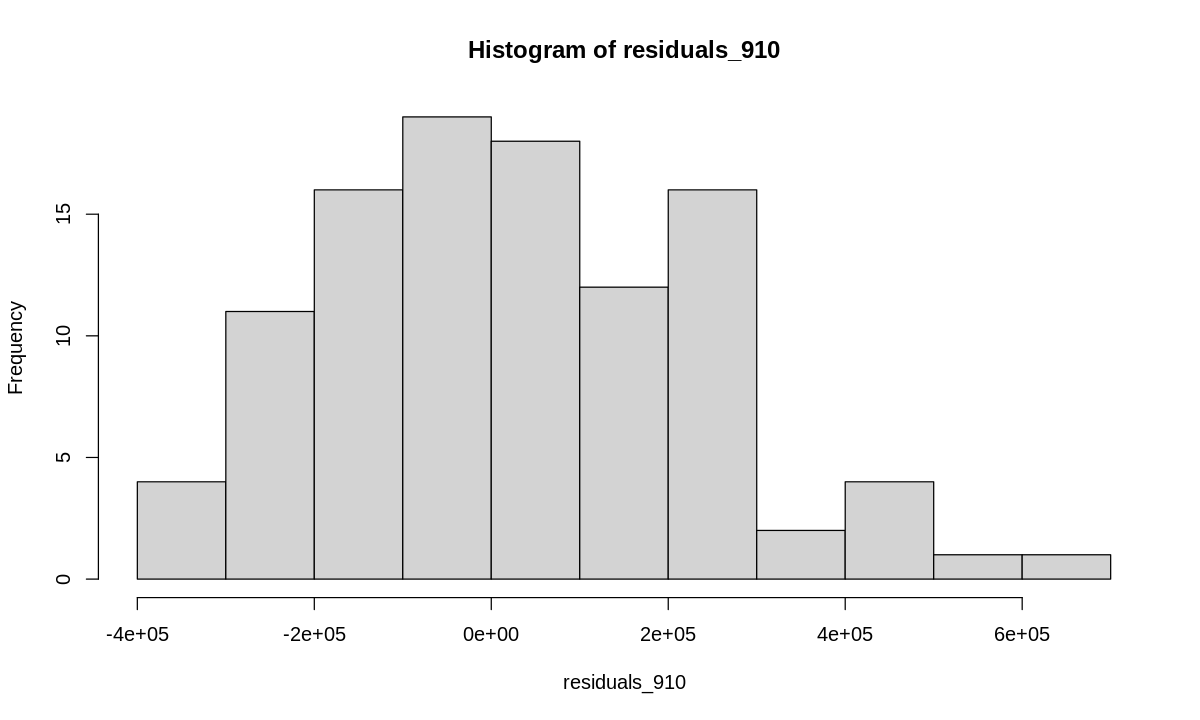

In [367]:
hist(residuals_910)


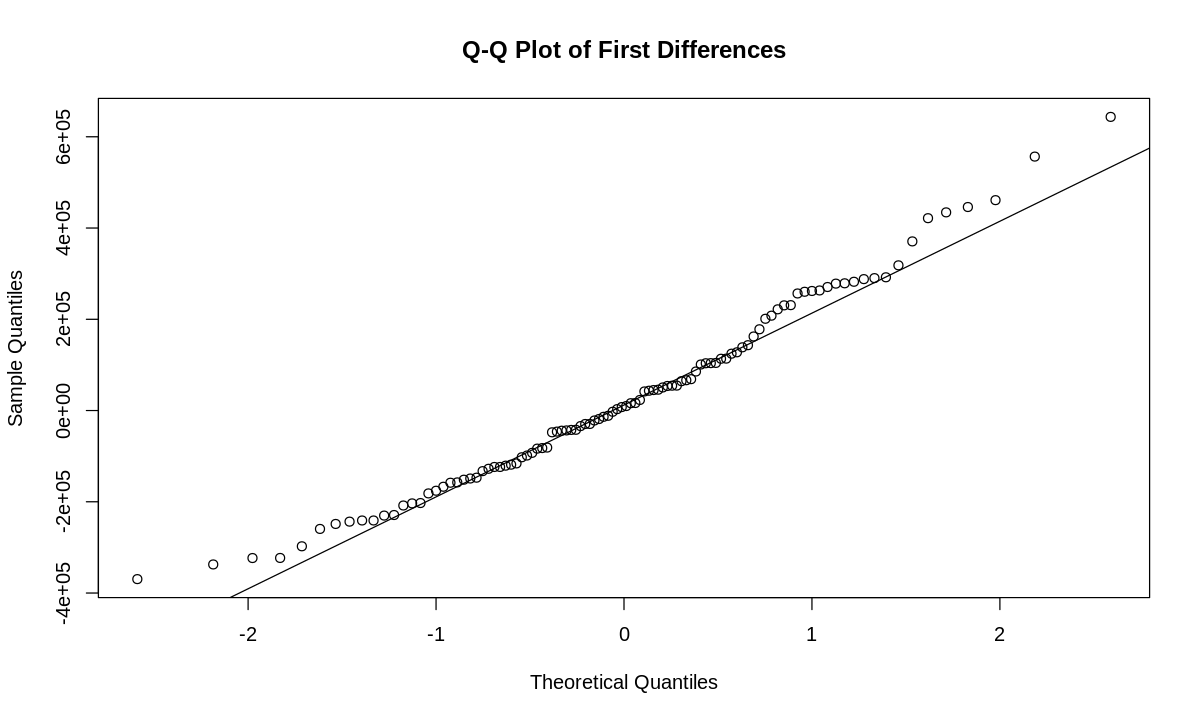

In [368]:
qqnorm(residuals_910, main = "Q-Q Plot of First Differences")
qqline(residuals_910)

In [369]:
# Check for normality
shapiro.test(residuals_910)



	Shapiro-Wilk normality test

data:  residuals_910
W = 0.97925, p-value = 0.1021


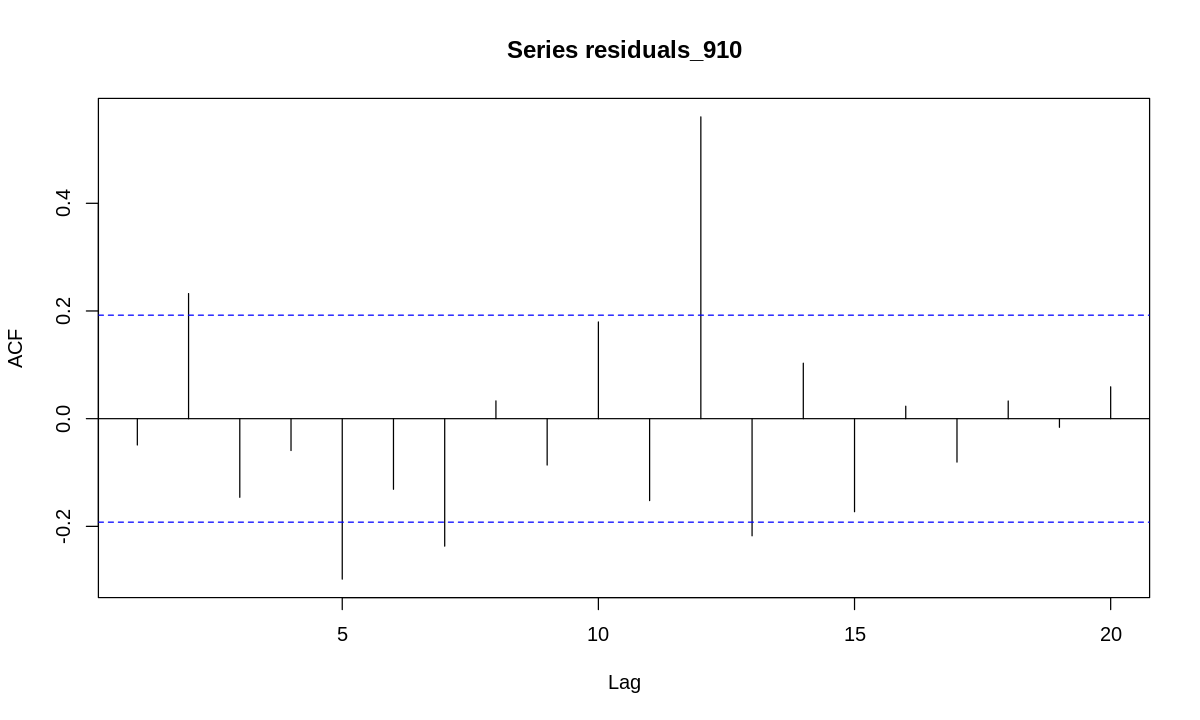

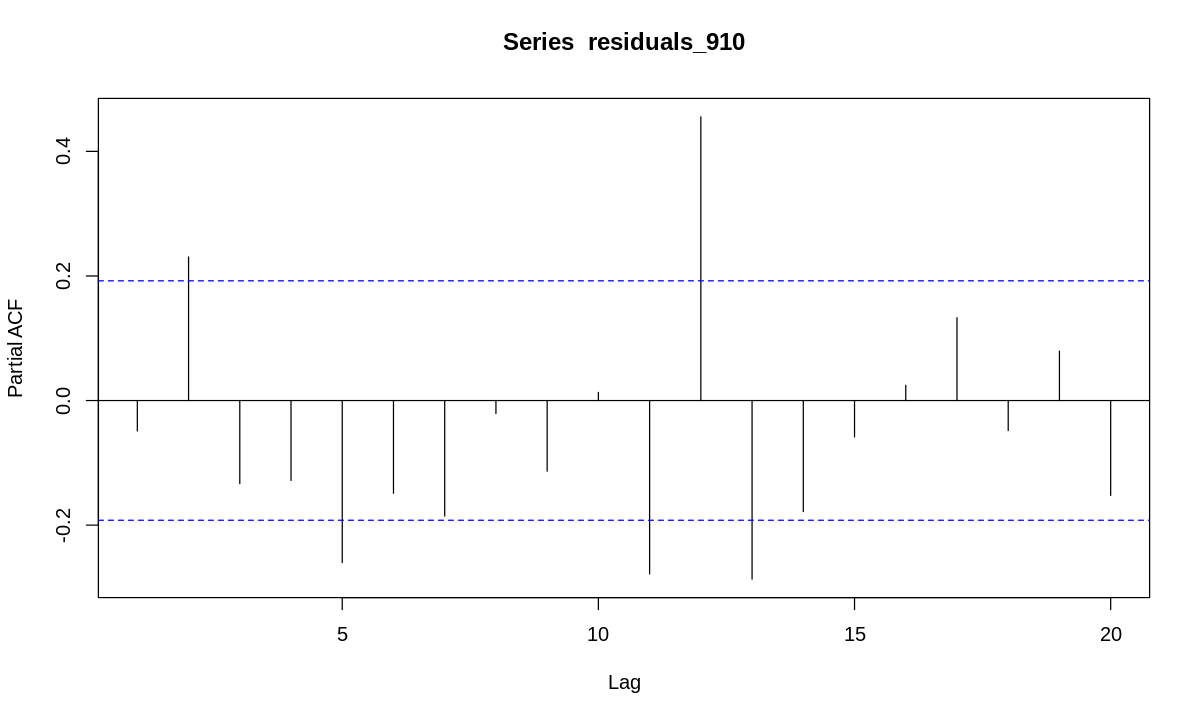

In [370]:
#Check for autocorrelation
acf(residuals_910)
pacf(residuals_910)

In [371]:
#Check for independence
RunsTest(residuals_910)


	Runs Test for Randomness

data:  residuals_910
z = -0.098538, runs = 52, m = 52, n = 52, p-value = 0.9215
alternative hypothesis: true number of runs is not equal the expected number
sample estimates:
median(x) 
 8696.652 


## **Conclusion on ARIMA(9,1,0) Validity**

The residual analysis of the ARIMA(9,1,0) model reveals a mixed picture:

- **Normality**: The residuals appear to exhibit normality, as indicated by visual inspection of the plot and confirmed by the Shapiro-Wilk test, indicating that the residuals exhibit characteristics of normality.
  
- **Independence**: Similarly, the runs test for randomness yields a non-significant p-value of 0.9215,  which  implies that they exhibit randomness
  
Based on these results, the ARIMA(9,1,0) model demonstrates satisfactory performance in capturing the underlying patterns and dynamics of the time series data. Both normality and randomness assumptions appear to hold for the residuals, supporting the validity of the model for forecasting purposes.



## **Selection of Another Model Based on ACF and PACF Analysis**

After analyzing the (ACF) and (PACF) of the first difference data, we can get insights into the potential orders of  (AR) and (MA) components for the ARIMA model.

The significant lags will guide the selection of AR and MA orders for the ARIMA model.

**ARIMA(6,1,2)** model will be considered.


## Fitting ARIMA(6,1,2) Model




In [372]:
arima_model_612 = Arima(ts_data_numeric, order = c(6, 1, 2))

summary(arima_model_612)

Series: ts_data_numeric 
ARIMA(6,1,2) 

Coefficients:
         ar1      ar2     ar3      ar4     ar5     ar6      ma1     ma2
      0.7324  -0.3264  0.2534  -0.0269  0.2175  0.1367  -1.5681  0.6059
s.e.  0.1831   0.1295  0.1276   0.1329  0.1199  0.1326   0.1654  0.1619

sigma^2 = 5.613e+10:  log likelihood = -1418.57
AIC=2855.14   AICc=2857.07   BIC=2878.85

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -1440.901 226437.2 172890.2 -0.2804908 4.114275 0.6776564
                    ACF1
Training set -0.01027441


	Ljung-Box test

data:  Residuals from ARIMA(6,1,2)
Q* = 13.791, df = 3, p-value = 0.003204

Model df: 8.   Total lags used: 11



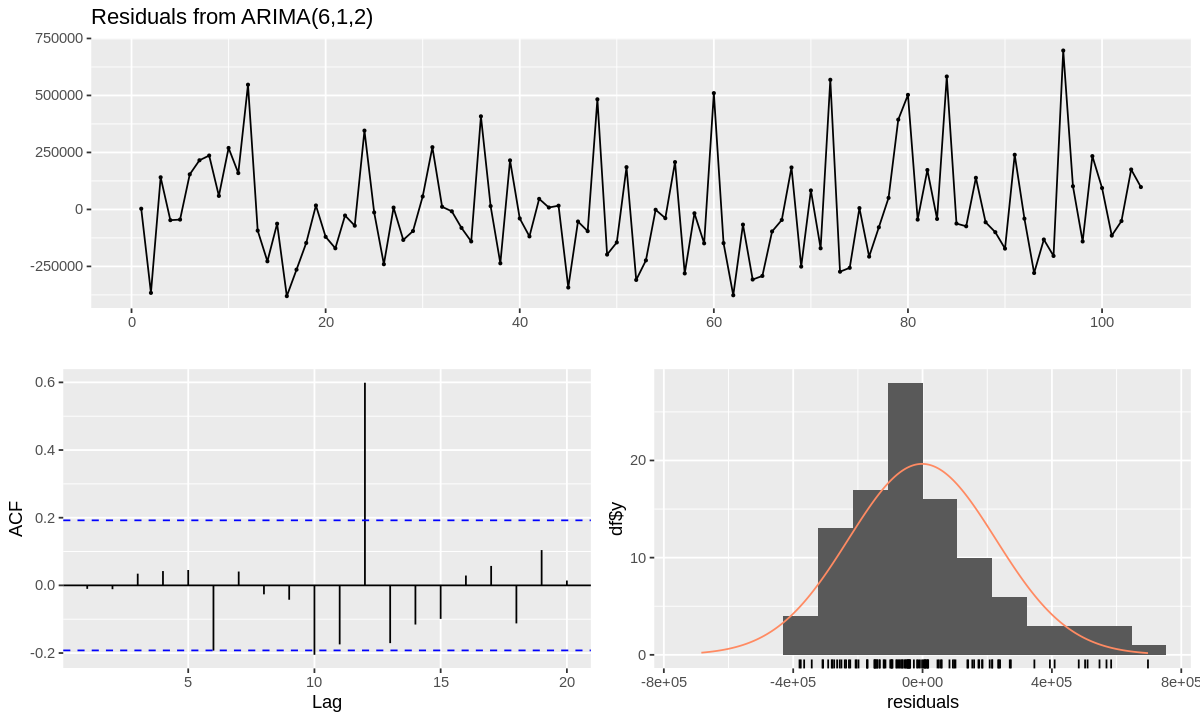

In [373]:
# Diagnostic checks
checkresiduals(arima_model_612)

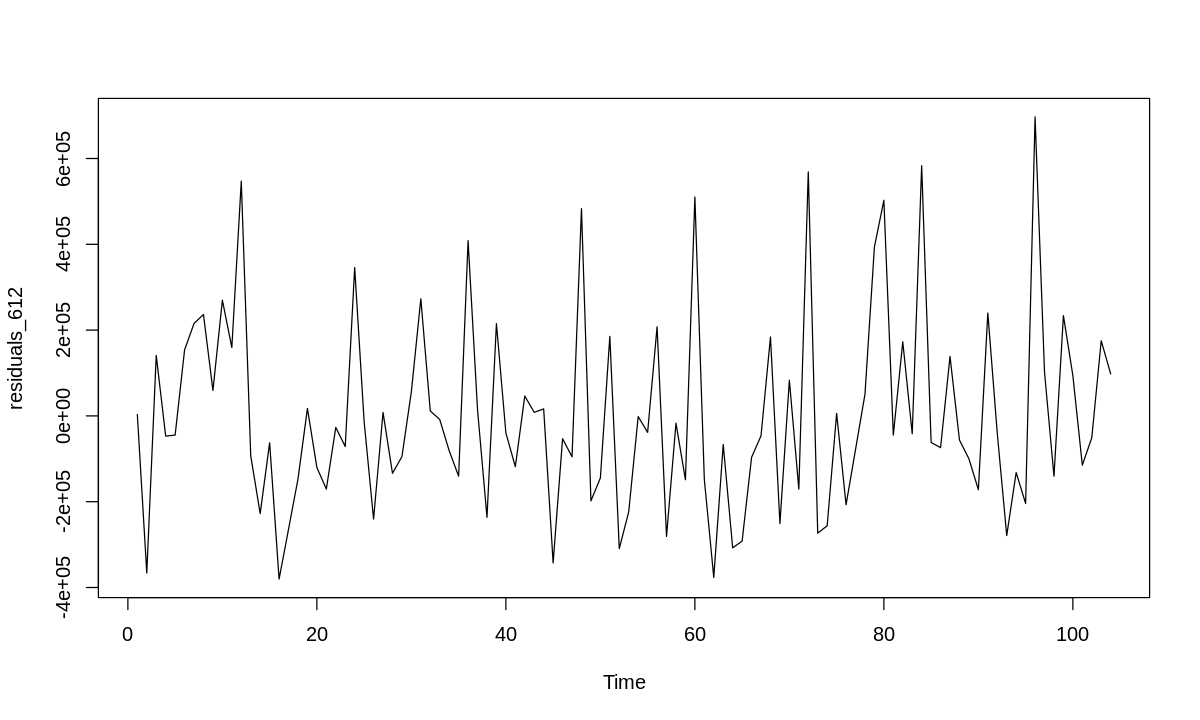

In [374]:
residuals_612 = residuals(arima_model_612)

plot(residuals_612)

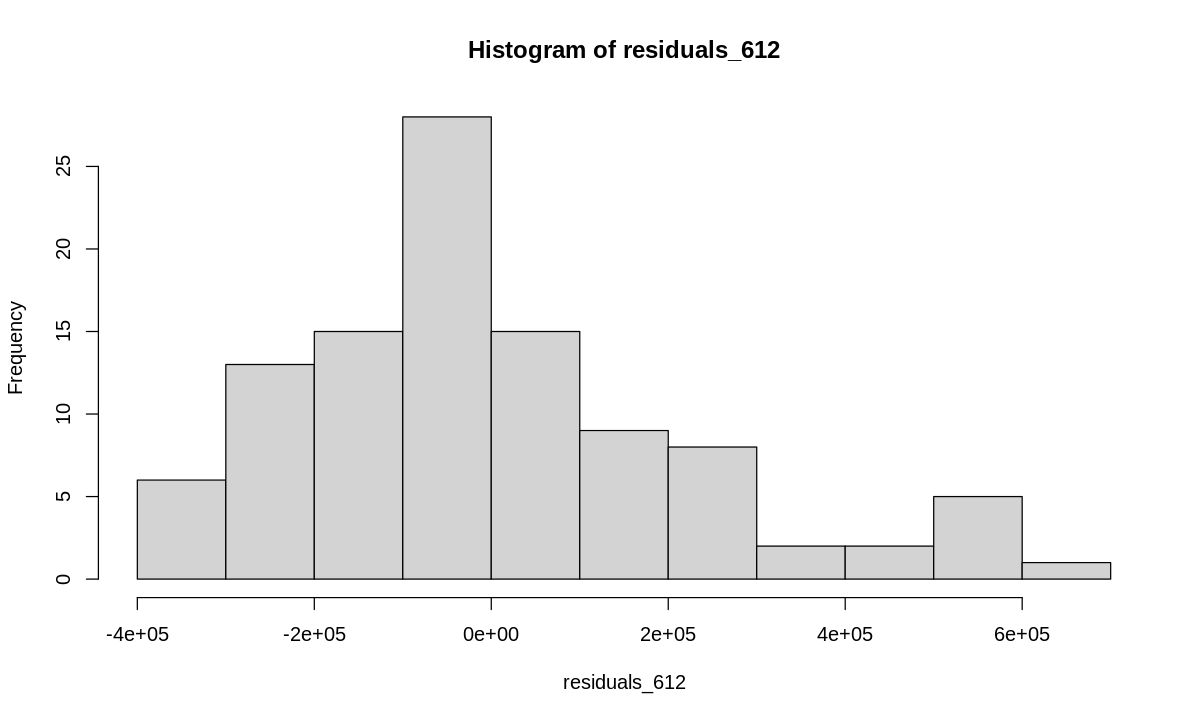

In [375]:
hist(residuals_612)


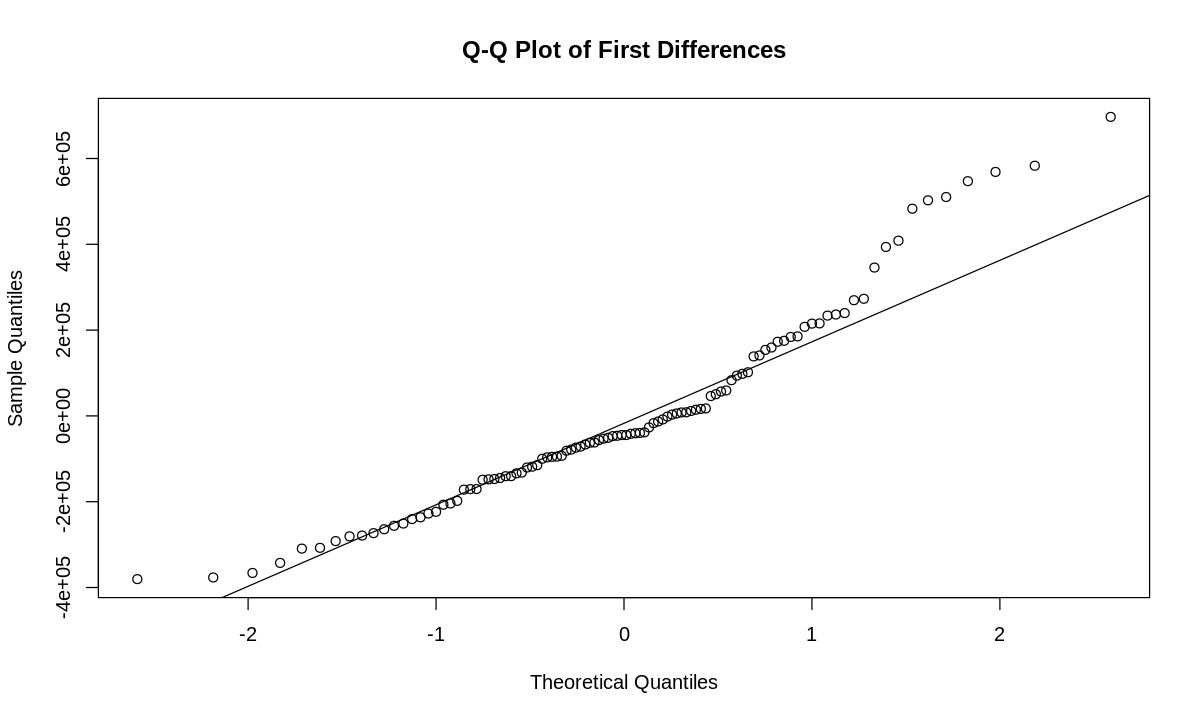

In [376]:
qqnorm(residuals_612, main = "Q-Q Plot of First Differences")
qqline(residuals_612)

In [377]:
# Check for normality
shapiro.test(residuals_612)



	Shapiro-Wilk normality test

data:  residuals_612
W = 0.94052, p-value = 0.0001526


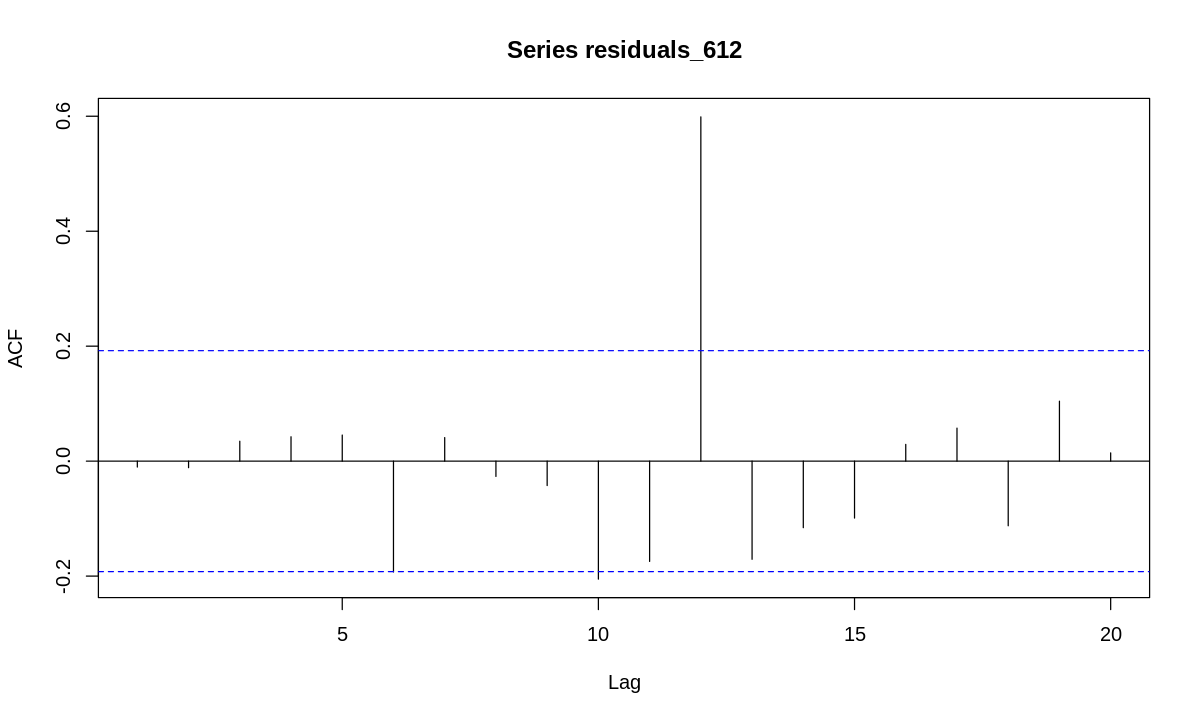

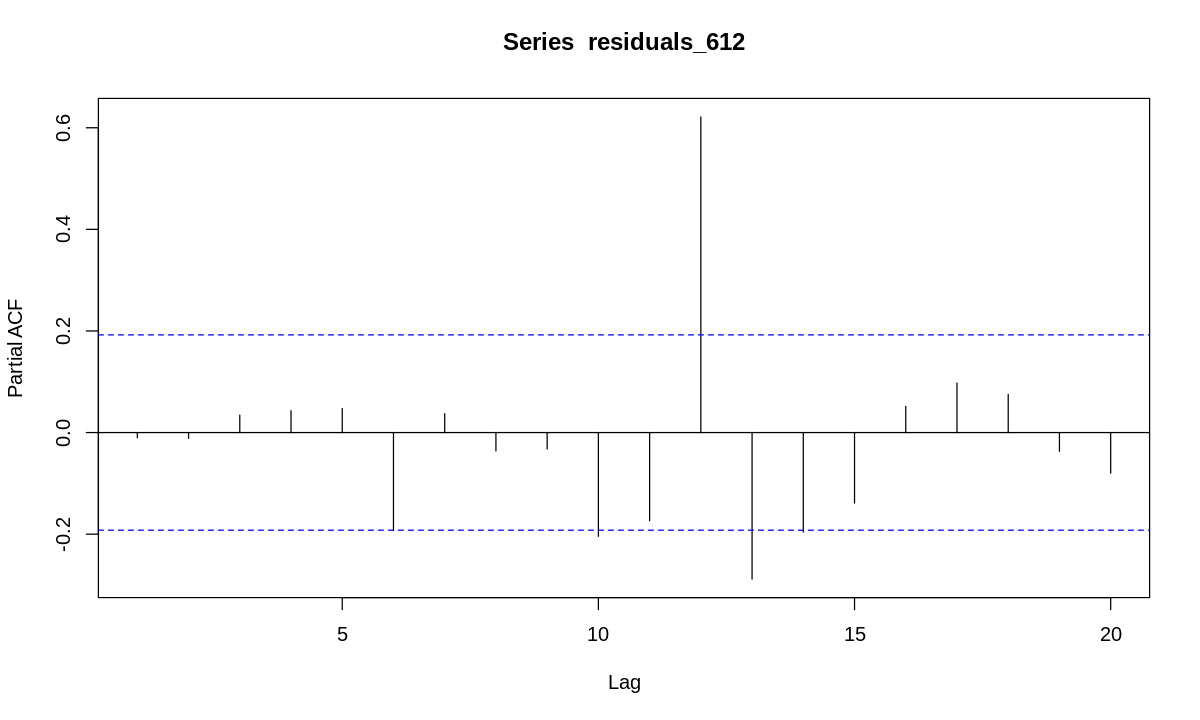

In [378]:
#Check for autocorrelation
acf(residuals_612)
pacf(residuals_612)

In [379]:
#Check for independence
RunsTest(residuals_612)


	Runs Test for Randomness

data:  residuals_612
z = -0.29561, runs = 51, m = 52, n = 52, p-value = 0.7675
alternative hypothesis: true number of runs is not equal the expected number
sample estimates:
median(x) 
-44639.57 


## Conclusion on ARIMA(6,1,2) Validity

The analysis of the residuals from the ARIMA(6,1,2) model provides the following insights:

- **Normality**: The Shapiro-Wilk test got a very low p-value of 0.0001526, indicating that the residuals do not follow a normal distribution.
  
- **Independence**: However, the runs test for randomness yields a non-significant p-value of 0.7675, suggesting randomness in the residuals.
  

Which means that the residuals are  **not normal white noise**, hence, the summary of the model is not valid


## Using the **auto.arima()** Function

We will use the `auto.model` function to automatically select an optimal ARIMA model based on various criteria such as AIC, AICc, and BIC. This function will systematically evaluate a range of ARIMA configurations and recommend the model with the best fit to the time series data.



In [380]:
auto_model = auto.arima(ts_data_numeric)
summary(auto_model)

Series: ts_data_numeric 
ARIMA(0,1,3) with drift 

Coefficients:
          ma1      ma2     ma3      drift
      -0.8738  -0.3699  0.4517  23967.800
s.e.   0.0912   0.1069  0.0918   4851.834

sigma^2 = 5.565e+10:  log likelihood = -1419.37
AIC=2848.73   AICc=2849.35   BIC=2861.9

Training set error measures:
                    ME     RMSE      MAE        MPE    MAPE      MASE
Training set -4870.704 230171.2 173884.5 -0.2625454 4.10163 0.6815536
                   ACF1
Training set 0.04738782


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3) with drift
Q* = 12.545, df = 7, p-value = 0.08401

Model df: 3.   Total lags used: 10



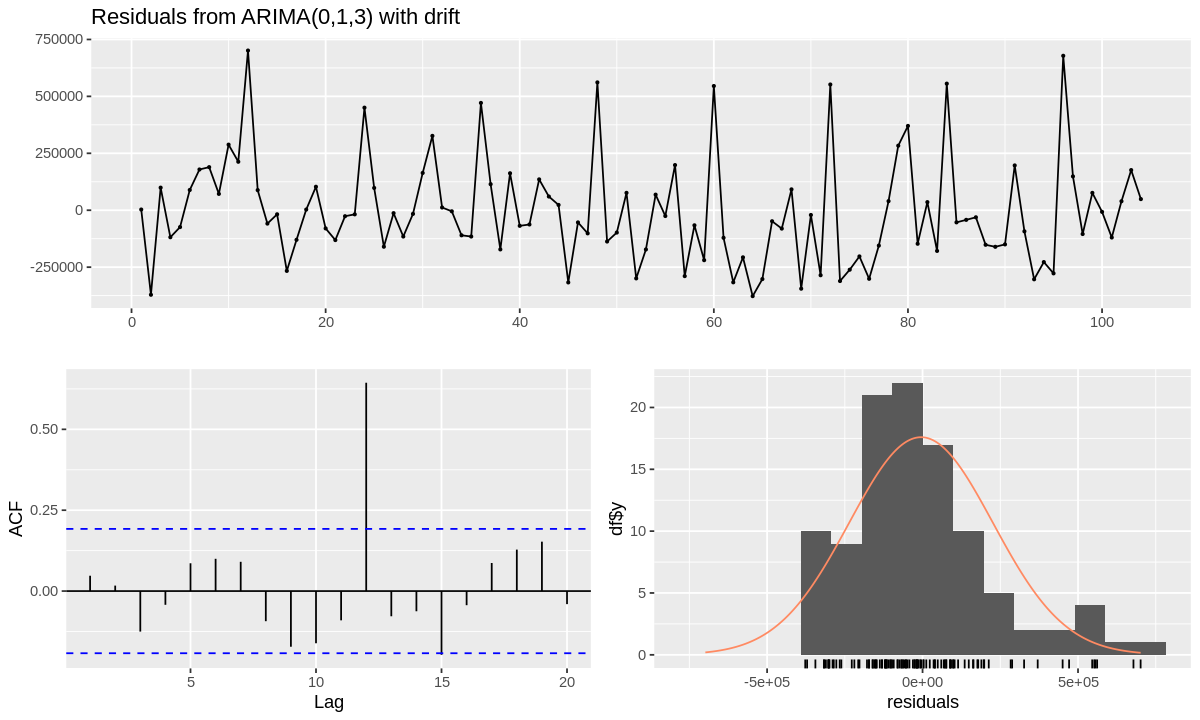

In [381]:
# Diagnostic checks
checkresiduals(auto_model)

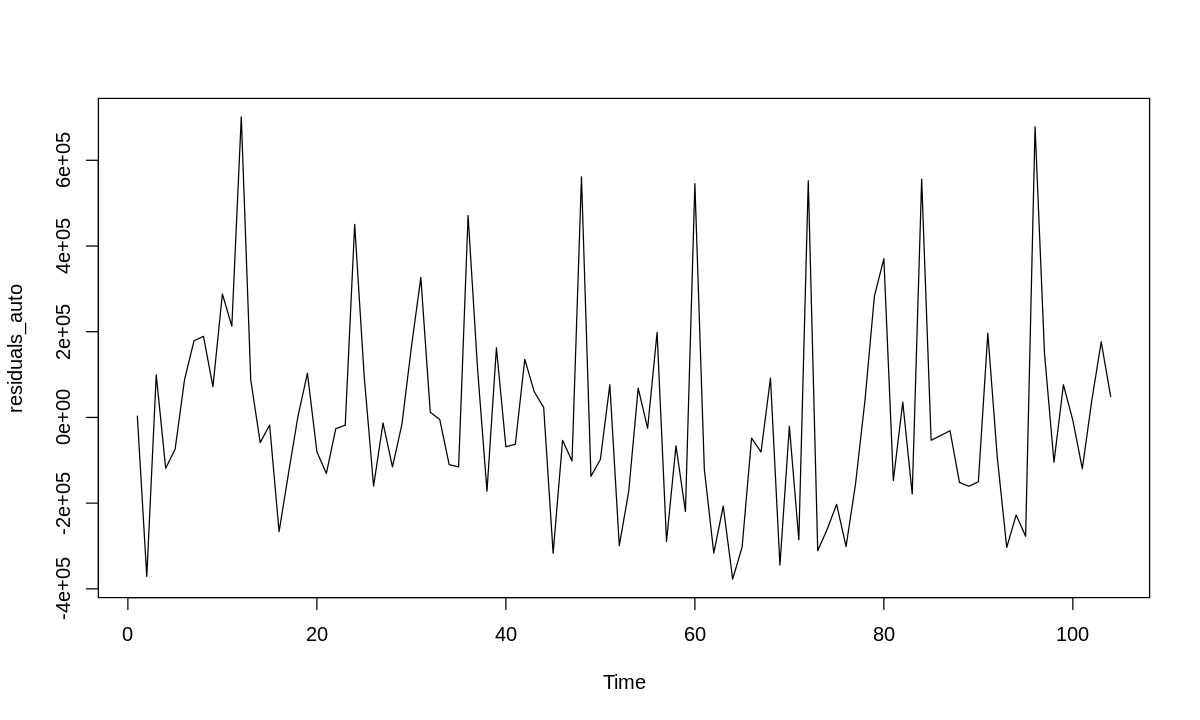

In [382]:
residuals_auto = residuals(auto_model)

plot(residuals_auto)

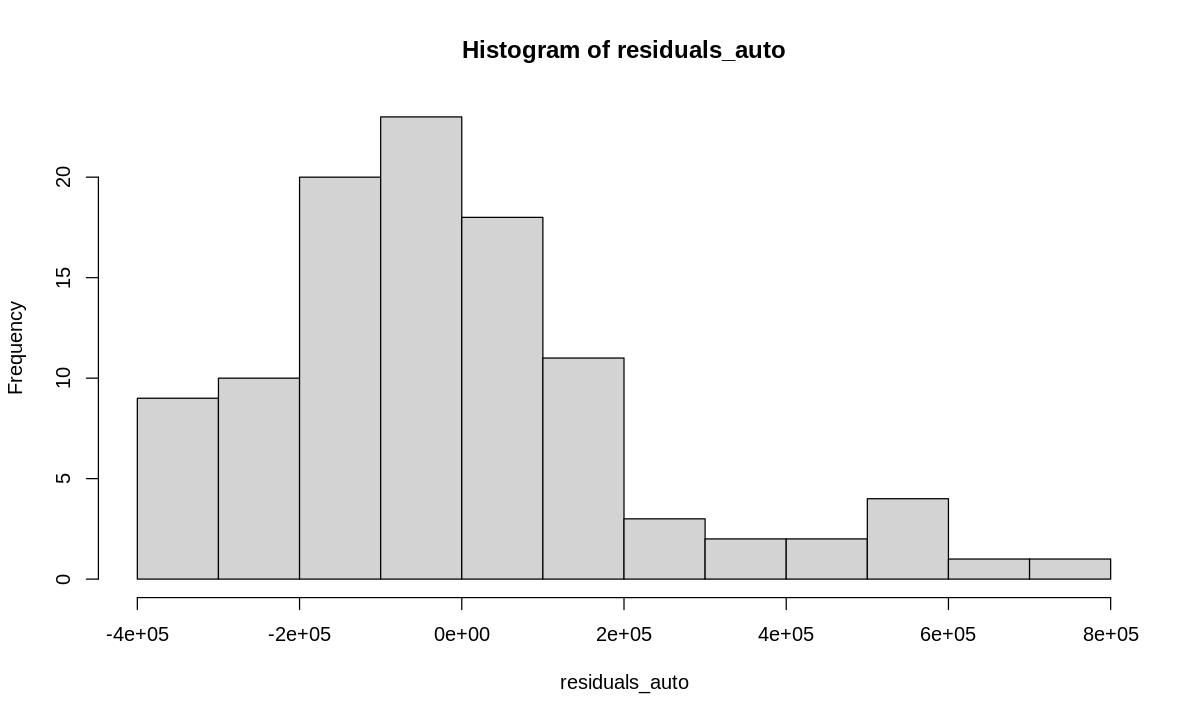

In [383]:
hist(residuals_auto)


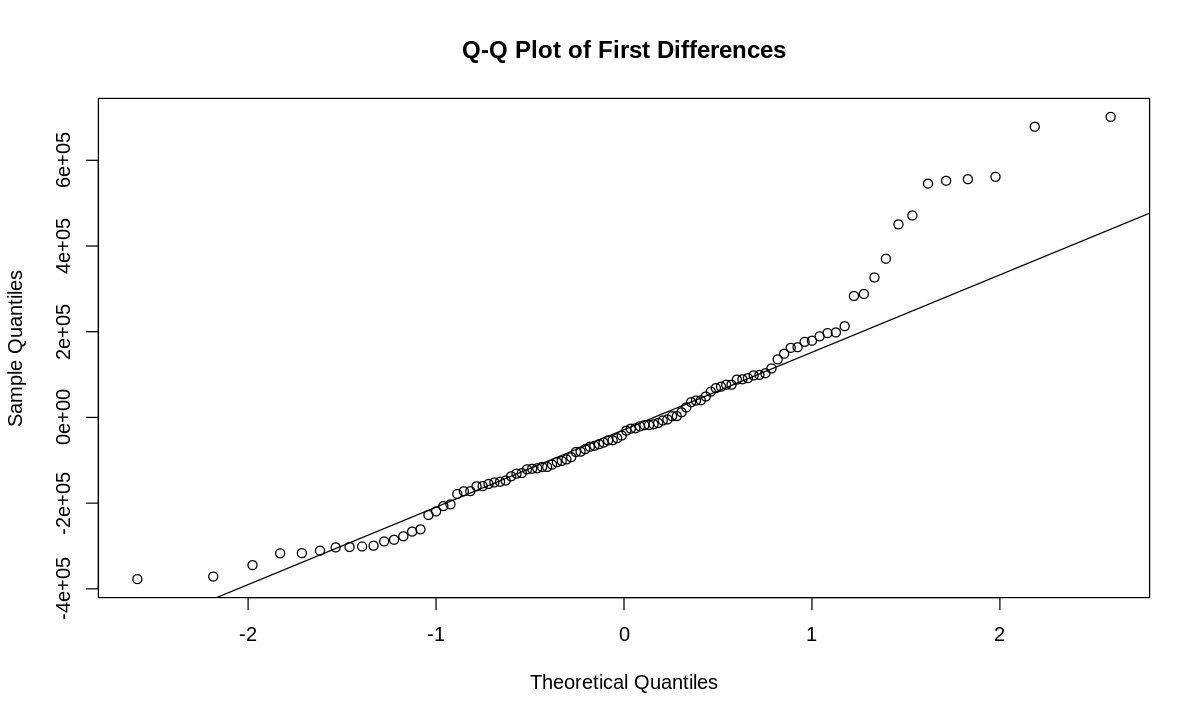

In [384]:
qqnorm(residuals_auto, main = "Q-Q Plot of First Differences")
qqline(residuals_auto)

In [385]:
# Check for normality
shapiro.test(residuals_auto)



	Shapiro-Wilk normality test

data:  residuals_auto
W = 0.92954, p-value = 3.34e-05


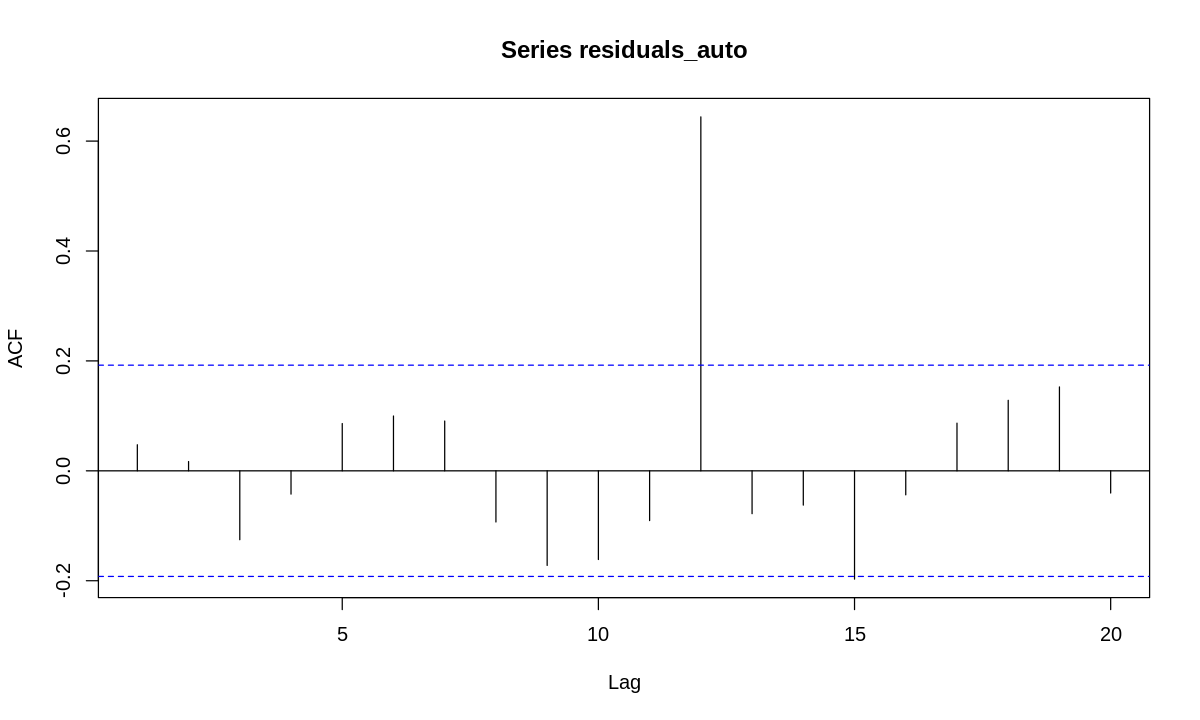

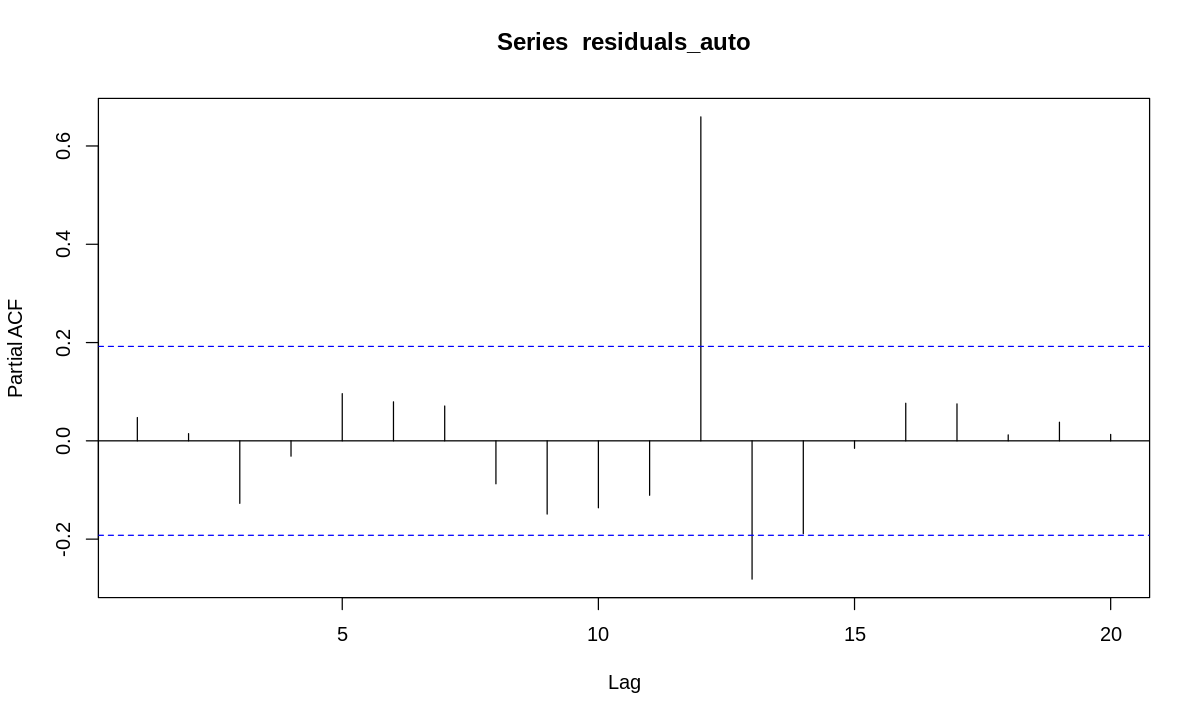

In [386]:
#Check for autocorrelation
acf(residuals_auto)
pacf(residuals_auto)

In [387]:
#Check for independence
RunsTest(residuals_auto)


	Runs Test for Randomness

data:  residuals_auto
z = -0.29561, runs = 51, m = 52, n = 52, p-value = 0.7675
alternative hypothesis: true number of runs is not equal the expected number
sample estimates:
median(x) 
-36684.66 


## **Conclusion on ARIMA(0,1,3) Validity**

The analysis of the residuals from the ARIMA(0,1,3) model provides the following insights:

- **Normality**: The Shapiro-Wilk test reveals a significant departure from normality, with a very low p-value of 3.34e-05, indicating that the residuals do not follow a normal distribution.
  
- **Independence**: The runs test for randomness yields a non-significant p-value of 0.7675, which  implies that they exhibit randomness
  

Which means that the residuals are  **not normal white noise**, hence, the summary of the model is not valid

# **Section 3: Forecasting**


## **Exploring Multiple Forecasting Models**

Given the small set of candidate models for forecasting, we have decided to explore both the ARIMA(1,1,0) and ARIMA(9,1,0) models. By considering multiple models, we aim to compare their performance and select the one that provides the most accurate and reliable forecasts for the time series data. .


In [388]:
original_data_ts = ts(data, start = c(2009, 1),frequency = 12)

In [389]:
test_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,,,,,4927561,5155327,5173747,5861990
2018,5303639,4932345,5555117,5430745,5294980,5565775,5723094,5682688,5225903,5376234,5408993,6127843
2019,5656076,5131807,5630780,5580503,5407308,5816089,5910782,5900629,5469342,5646643,,


## Forecasting with ARIMA(1,1,0) Model



In [390]:
forecast_horizon = 26
forecasts_110 =  forecast(arima_model_110, h = forecast_horizon)
summary(arima_model_110)

Series: ts_data_numeric 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.3033
s.e.   0.0947

sigma^2 = 9.397e+10:  log likelihood = -1446.91
AIC=2897.82   AICc=2897.94   BIC=2903.09

Training set error measures:
                   ME   RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 28169.89 303584 235036.1 0.3801744 5.589277 0.9212417 -0.1326883

In [391]:
print(forecasts_110)

    Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
105        5311206 4918352 5704060 4710387 5912025
106        5297405 4818606 5776205 4565144 6029666
107        5301591 4731283 5871899 4429380 6173802
108        5300321 4656441 5944202 4315592 6285051
109        5300706 4589433 6011980 4212907 6388506
110        5300590 4528171 6073009 4119277 6481902
111        5300625 4471448 6129803 4032508 6568743
112        5300614 4418354 6182875 3951313 6649916
113        5300618 4368282 6232953 3874733 6726502
114        5300617 4320765 6280469 3802062 6799171
115        5300617 4275448 6325786 3732756 6868478
116        5300617 4232051 6369183 3666386 6934848
117        5300617 4190349 6410885 3602608 6998626
118        5300617 4150157 6451076 3541141 7060093
119        5300617 4111324 6489910 3481750 7119484
120        5300617 4073718 6527516 3424237 7176997
121        5300617 4037232 6564002 3368436 7232798
122        5300617 4001770 6599464 3314202 7287032
123        5300617 3967251 6633

In [392]:
predicted_values_110 =  forecasts_110$mean
predicted_values_110

A Time Series:
 [1] 5311206 5297405 5301591 5300321 5300706 5300590 5300625 5300614 5300618
[10] 5300617 5300617 5300617 5300617 5300617 5300617 5300617 5300617 5300617
[19] 5300617 5300617 5300617 5300617 5300617 5300617 5300617 5300617

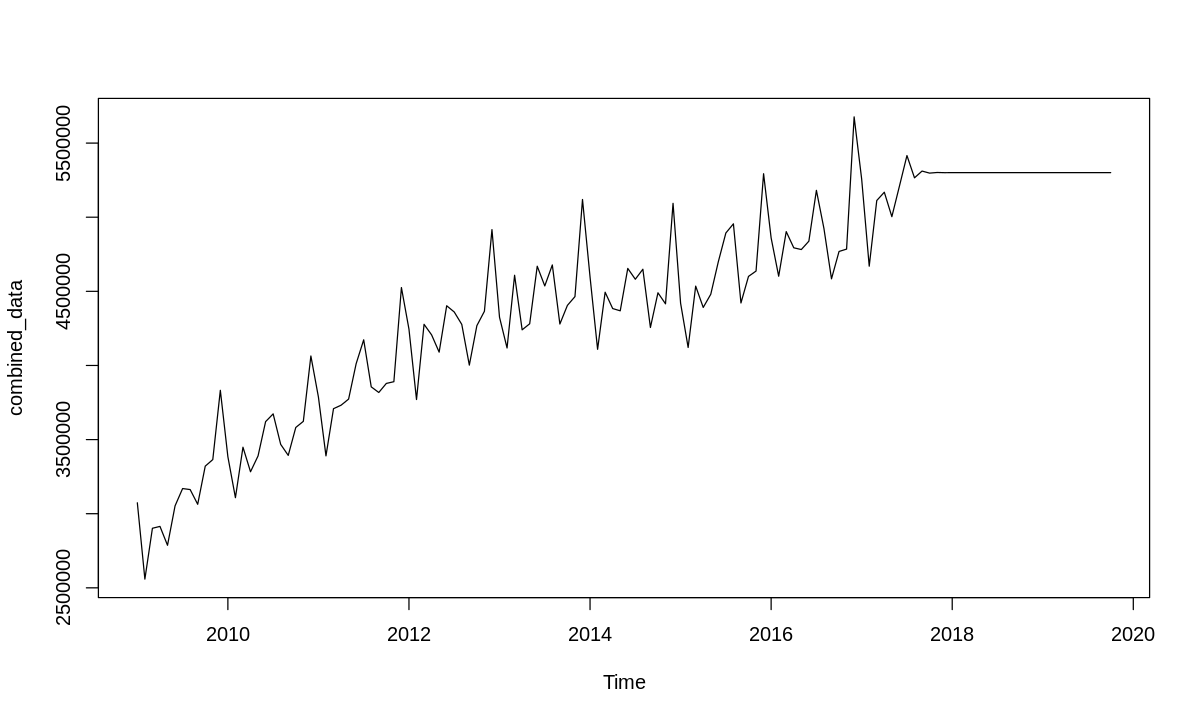

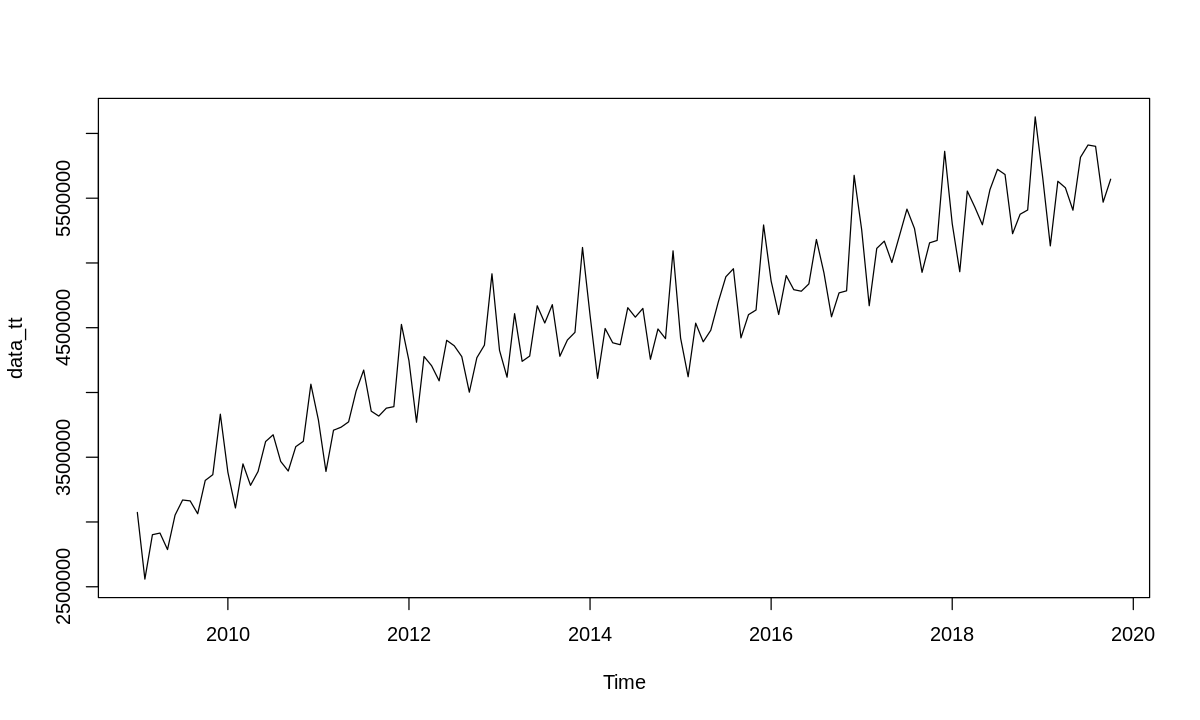

In [393]:
combined_data = c(ts_data, predicted_values_110)

combined_data = ts(combined_data, start = c(2009, 1),frequency = 12)
plot(combined_data)
plot(data_tt)


## Forecasting with ARIMA(9,1,0) Model



In [394]:
forecast_horizon = 26
forecasts_910 =  forecast(arima_model_910, h = forecast_horizon)
summary(arima_model_910)

Series: ts_data_numeric 
ARIMA(9,1,0) 

Coefficients:
          ar1      ar2      ar3      ar4     ar5     ar6     ar7     ar8
      -0.7699  -0.8878  -0.5305  -0.3315  0.1458  0.3561  0.6297  0.5265
s.e.   0.0848   0.1006   0.1178   0.1234  0.1296  0.1279  0.1208  0.1042
         ar9
      0.5115
s.e.  0.0873

sigma^2 = 4.803e+10:  log likelihood = -1410.27
AIC=2840.54   AICc=2842.93   BIC=2866.89

Training set error measures:
                   ME     RMSE    MAE      MPE     MAPE      MASE        ACF1
Training set 28398.31 208351.8 164512 0.519382 3.944839 0.6448172 -0.04887137

In [395]:
print(forecasts_910)

    Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
105        5174730 4893872 5455587 4745195 5604264
106        4951007 4662812 5239203 4510250 5391765
107        5154536 4865765 5443308 4712898 5596174
108        5549824 5247784 5851865 5087893 6011755
109        5336441 5017809 5655073 4849135 5823746
110        5203290 4849686 5556894 4662500 5744081
111        5272516 4891746 5653286 4690178 5854853
112        5239150 4829895 5648405 4613249 5865051
113        5209374 4782894 5635854 4557129 5861620
114        5342826 4893297 5792355 4655331 6030321
115        5407474 4951524 5863423 4710159 6104789
116        5406640 4923753 5889527 4668129 6145152
117        5314764 4774172 5855357 4487999 6141529
118        5155811 4592737 5718885 4294664 6016958
119        5294953 4713531 5876375 4405744 6184161
120        5433998 4836808 6031188 4520674 6347321
121        5392386 4773389 6011383 4445711 6339060
122        5361922 4716825 6007019 4375331 6348512
123        5348307 4673341 6023

In [396]:
predicted_values_910 =  forecasts_910$mean
predicted_values_910

A Time Series:
 [1] 5174730 4951007 5154536 5549824 5336441 5203290 5272516 5239150 5209374
[10] 5342826 5407474 5406640 5314764 5155811 5294953 5433998 5392386 5361922
[19] 5348307 5300269 5300239 5360603 5404395 5438381 5359505 5283808

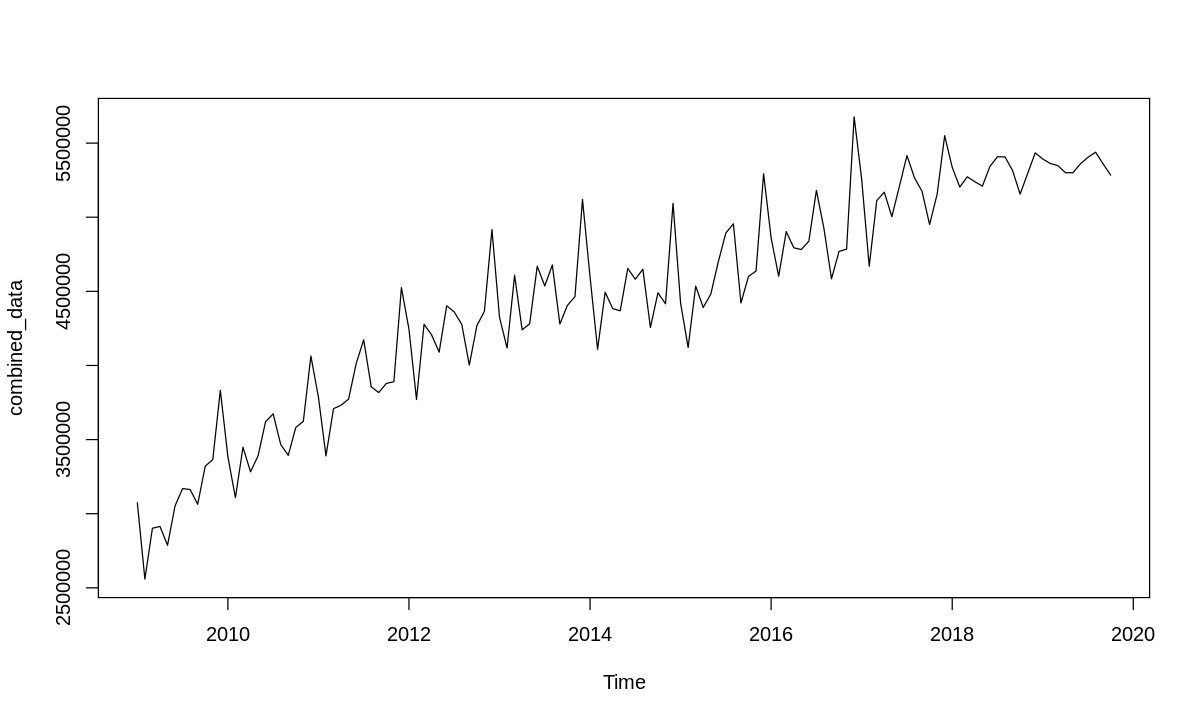

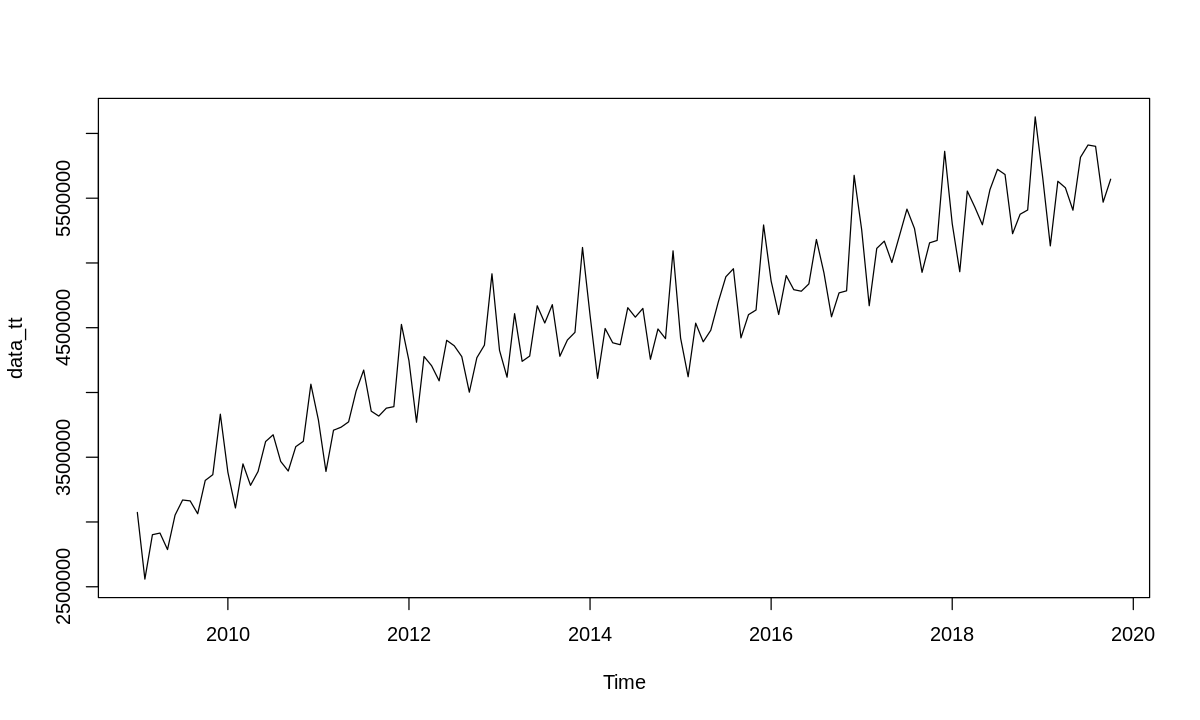

In [397]:
combined_data = c(ts_data, predicted_values_910)

combined_data = ts(combined_data, start = c(2009, 1),frequency = 12)
plot(combined_data)
plot(data_tt)


## **Comparison of ARIMA Condidates Models**

### **ARIMA(9,1,0) Model Summary**
- **Coefficients**: The ARIMA(9,1,0) model includes (AR) terms up to lag 9, indicating a significant dependence on past values of the time series data.
- **Error Measures**: The model achieves relatively low error measures on the training set, with a Root Mean Squared Error (RMSE) of 208351.8 and Mean Absolute Error (MAE) of 164512.
- **Forecasting Accuracy**: The ARIMA(9,1,0) model closely follows the observed data, suggesting a good fit to the underlying patterns and dynamics of the time series.

### **ARIMA(1,1,0) Model Summary**
- **Coefficients**: The ARIMA(1,1,0) model includes a single (AR) term, indicating a relatively simpler model structure compared to ARIMA(9,1,0).
- **Error Measures**: While the ARIMA(1,1,0) model exhibits slightly higher error measures on the training set compared to ARIMA(9,1,0), with an RMSE of 303584 and MAE of 235036.1, it still provides reasonable forecasting accuracy.
- **Forecasting Accuracy**: The ARIMA(1,1,0) model may not capture all nuances of the time series data due to its simpler structure, resulting in slightly higher forecasting errors compared to ARIMA(9,1,0).



## **Selected ARIMA Model for Future Predictions**

After this analysis, we have selected the ARIMA(9,1,0) model as the chosen model for future predictions.


In [398]:
original_data_ts_numeric = as.numeric(original_data_ts)
original_data_ts_numeric

[1] 3073677 2558953 2901885 2914509 2787124 3053035 3169720 3162960 3063650
 [10] 3320887 3365250 3832328 3384473 3108244 3448617 3283071 3389972 3621082
 [19] 3673387 3467630 3393497 3581850 3623080 4063874 3787070 3390264 3708592
 [28] 3731875 3773137 4011823 4172971 3855722 3817720 3878788 3890535 4525348
 [37] 4244834 3770270 4277559 4206420 4089894 4402693 4360693 4276912 4002344
 [46] 4268532 4365456 4916197 4325530 4117962 4608339 4240461 4281153 4669334
 [55] 4536572 4678005 4279588 4405289 4464415 5119439 4596764 4109038 4493991
 [64] 4383872 4368639 4654569 4581591 4649022 4256229 4490180 4415710 5093465
 [73] 4420122 4121357 4535119 4391381 4480261 4699589 4893574 4955301 4421554
 [82] 4600789 4636752 5293165 4860156 4602026 4902767 4793662 4781918 4838307
 [91] 5181108 4923309 4584383 4768937 4784818 5676648 5256301 4669729 5112576
[100] 5168548 5003578 5208779 5415734 5265703 4927561 5155327 5173747 5861990
[109] 5303639 4932345 5555117 5430745 5294980 5565775 5723094 5682688 5225903
[118] 5376234 5408993 6127843 5656076 5131807 5630780 5580503 5407308 5816089
[127] 5910782 5900629 5469342 5646643

In [399]:
model = Arima(original_data_ts_numeric, order = c(9, 1, 0))
summary(model)

Series: original_data_ts_numeric 
ARIMA(9,1,0) 

Coefficients:
          ar1      ar2      ar3      ar4     ar5     ar6     ar7     ar8
      -0.8075  -0.9369  -0.5653  -0.3355  0.1625  0.3775  0.6781  0.5778
s.e.   0.0745   0.0887   0.1064   0.1135  0.1204  0.1186  0.1109  0.0920
         ar9
      0.5251
s.e.  0.0755

sigma^2 = 4.66e+10:  log likelihood = -1765.16
AIC=3550.33   AICc=3552.19   BIC=3578.93

Training set error measures:
                   ME   RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 29836.98 207391 165613.5 0.5184848 3.778818 0.6277771 -0.08987307

# **Conclusion**

Upon analyzing the summaries and error measures for the ARIMA models used in the project, it is evident that the ARIMA(9,1,0) model generally provides a better fit to the data and offers improved forecasting accuracy compared to the ARIMA(1,1,0) model.

However, while this analysis suggests that the ARIMA(9,1,0) model provides a better fit to the data and offers improved forecasting accuracy compared to the ARIMA(1,1,0) model, it's important to note that this does not necessarily mean that ARIMA(9,1,0) is the best model overall. However, based on the results obtained, we can conclude that the ARIMA(9,1,0) model fits the data well and demonstrates promising forecasting capabilities.


---
# **END**
